# **A Data Science Project on Credit Default Risk Analysis**
##### Author:Mukesh Kumar Chaudhary
##### Email:cmukesh8688@gmail.com

### **Problem Statement**
Home Credit B.V. is an international non-bank financial institution founded in 1997 in the Czech Republic.The company operates in 14 countries and focuses on lending primarily to people with little or no credit history. As of 2016 the company has over 15 million active customers, with two-thirds of them in Asia and 7.3 million in China. 

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.


### **Data**


- application_{train|test}.csv

 - This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET).
 - Static data for all applications. One row represents one loan in our data sample.
 
 
- bureau.csv
 - All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a      loan in our sample).
 - For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.
 
 
- bureau_balance.csv
 - Monthly balances of previous credits in Credit Bureau.
 - This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in      sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.
 

- POS_CASH_balance.csv
 - Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
 - This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to    loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some        history observable for the previous credits) rows.
 
 
- credit_card_balance.csv
 - Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
 - This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to    loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some      history observable for the previous credit card) rows.
 
 
- previous_application.csv
 - All previous applications for Home Credit loans of clients who have loans in our sample.
 - There is one row for each previous application related to loans in our data sample.
 
 
- installments_payments.csv
 - Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.
   There is a) one row for every payment that was made plus b) one row each for missed payment.
   One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit    credit related to loans in our sample.
   

- train_bureau.csv 
 - This dataframe is created manualy by group joining application_train,bureau and bureau_balance dataframe with aggregation funtion count,sum,max,min,mean .
 
 
- previous_loan_final.csv
 -  This dataframe is created manually by group joining previous_application,POS_CASH_balance,credi_card_balance and intallments_payments dataframe with aggregation funtion count,sum,max,min,mean .
 
 
- home_credit_final.csv
 - This dataframe is created manually by joining train_bureau.csv and previous_loan_final.csv. 
 
 
- automative_features_app.csv
 - This is created by auto generated library ***featuretools*** with aggregation premitives sum,max,min,mode,mean,count
 
 
![image](image/database_flowchart.png)


In [1]:
# import all necessary libraries
# for data mauplation
import pandas as pd 
import numpy as np

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns


# ignore warnig from pandas
import warnings
warnings.filterwarnings("ignore")


# for featuretools
import featuretools as ft

# import user libraries 
from text_format_class import TxtFormat 
import manage_missing_data as manage_df
import manage_dataframe as manage_agg_cat
import display_corr as manage_corr
import manage_model
import manage_pca
import plot_features
%load_ext autoreload
%autoreload 2



In [2]:
# import sklearn library for preprocessing ,modelling , Accuracy Analysis , Cross Validation , optimization 

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score
from  sklearn.model_selection import train_test_split

# XGBoosting 

import xgboost as xgb
from sklearn.metrics import mean_absolute_error

# Gradient Boosting algorithm
import os
import lightgbm as lgb
sns.set_style("darkgrid")

### Retrieving Data and Data dimension

In [3]:
# upload all Data 
pd.options.display.max_columns = None
df_app_train = pd.read_csv("Data/application_train.csv")
df_app_test = pd.read_csv("Data/application_test.csv")
#df_bureau = pd.read_csv("Data/bureau.csv")
#df_bureau_balance = pd.read_csv("Data/bureau_balance.csv")
#df_previous = pd.read_csv("Data/previous_application.csv")
#df_credit = pd.read_csv("Data/credit_card_balance.csv")
#df_cash = pd.read_csv("Data/POS_CASH_balance.csv")
#df_payment = pd.read_csv("Data/installments_payments.csv")

In [4]:
# Dimension of Data 
print("Dimension of Data")
print("------------------")
print("Application Train    : ", df_app_train.shape )
print("Application Test     :",df_app_test.shape)
#print("Bureau               :" ,df_bureau.shape)
#print("Bureau Balance       :",df_bureau_balance.shape)
#print("Previous application : ",df_previous.shape)
#print("Credit card balance  :",df_credit.shape)
#print("POSH_CASH_balance    :" ,df_cash.shape)
#print("Instalments payment  :",df_payment.shape)


Dimension of Data
------------------
Application Train    :  (307511, 122)
Application Test     : (48744, 121)


In [6]:
# application_train from Home credit
print(df_app_train.shape)
df_app_train.head()


(307511, 122)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [7]:
# for test application
print(df_app_test.shape)
df_app_test.head()

(48744, 121)


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working               Higher education   
1   Unaccompanied          Working  Secondary / secondary special   
2             NaN          Working               Higher education   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0            Married  House / apartment                    0.018850   
1            Married  House / apartment                    0.035792   
2            Married  House / apartment                    0.019101   
3            Married  House / apartment                    0.026392   
4            Married  House / apartment                    0.010032   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0      -19241          -2329            -5170.0             -812          NaN   
1      -18064          -4469            -9118.0            -1623          NaN   
2      -20038          -4458            -2175.0            -3503          5.0   
3      -13976          -1866            -2000.0            -4208          NaN   
4      -13040          -2191            -4000.0            -4262         16.0   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           0   
1           1               1                0                 1           0   
2           1               1                0                 1           0   
3           1               1                0                 1           1   
4           1               1                1                 1           0   

   FLAG_EMAIL     OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           1                 NaN              2.0                     2   
1           0  Low-skill Laborers              2.0                     2   
2           0             Drivers              2.0                     2   
3           0         Sales staff              4.0                     2   
4           0                 NaN              3.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                    TUESDAY   
1                            2                     FRIDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                     FRIDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       18                           0   
1                        9                           0   
2                       14                           0   
3                       11                           0   
4                        5                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                   

In [8]:
# check columns names between application test and application train 
for col in df_app_train.columns:
    if col not in df_app_test.columns:
        print(col)

TARGET


In [9]:
#pd.options.display.max_columns = None
print(df_app_train.columns.values)

['SK_ID_CURR' 'TARGET' 'NAME_CONTRACT_TYPE' 'CODE_GENDER' 'FLAG_OWN_CAR'
 'FLAG_OWN_REALTY' 'CNT_CHILDREN' 'AMT_INCOME_TOTAL' 'AMT_CREDIT'
 'AMT_ANNUITY' 'AMT_GOODS_PRICE' 'NAME_TYPE_SUITE' 'NAME_INCOME_TYPE'
 'NAME_EDUCATION_TYPE' 'NAME_FAMILY_STATUS' 'NAME_HOUSING_TYPE'
 'REGION_POPULATION_RELATIVE' 'DAYS_BIRTH' 'DAYS_EMPLOYED'
 'DAYS_REGISTRATION' 'DAYS_ID_PUBLISH' 'OWN_CAR_AGE' 'FLAG_MOBIL'
 'FLAG_EMP_PHONE' 'FLAG_WORK_PHONE' 'FLAG_CONT_MOBILE' 'FLAG_PHONE'
 'FLAG_EMAIL' 'OCCUPATION_TYPE' 'CNT_FAM_MEMBERS' 'REGION_RATING_CLIENT'
 'REGION_RATING_CLIENT_W_CITY' 'WEEKDAY_APPR_PROCESS_START'
 'HOUR_APPR_PROCESS_START' 'REG_REGION_NOT_LIVE_REGION'
 'REG_REGION_NOT_WORK_REGION' 'LIVE_REGION_NOT_WORK_REGION'
 'REG_CITY_NOT_LIVE_CITY' 'REG_CITY_NOT_WORK_CITY'
 'LIVE_CITY_NOT_WORK_CITY' 'ORGANIZATION_TYPE' 'EXT_SOURCE_1'
 'EXT_SOURCE_2' 'EXT_SOURCE_3' 'APARTMENTS_AVG' 'BASEMENTAREA_AVG'
 'YEARS_BEGINEXPLUATATION_AVG' 'YEARS_BUILD_AVG' 'COMMONAREA_AVG'
 'ELEVATORS_AVG' 'ENTRANCES_AVG' 'FLOOR

### Checking missing values

In [5]:
# application train
manage_df.missing_data_display(df_app_train)

Total    Percent
COMMONAREA_MEDI              214865  69.872297
COMMONAREA_AVG               214865  69.872297
COMMONAREA_MODE              214865  69.872297
NONLIVINGAPARTMENTS_MODE     213514  69.432963
NONLIVINGAPARTMENTS_MEDI     213514  69.432963
...                             ...        ...
REG_CITY_NOT_LIVE_CITY            0   0.000000
LIVE_REGION_NOT_WORK_REGION       0   0.000000
REG_REGION_NOT_WORK_REGION        0   0.000000
HOUR_APPR_PROCESS_START           0   0.000000
SK_ID_CURR                        0   0.000000

[122 rows x 2 columns]

In [6]:
# delete missing value more than 40% 
manage_df.delete_missing_values(df_app_train)
manage_df.handle_missing_value(df_app_train)
manage_df.missing_data_display(df_app_train)

Total  Percent
AMT_REQ_CREDIT_BUREAU_YEAR       0      0.0
LIVE_REGION_NOT_WORK_REGION      0      0.0
DAYS_REGISTRATION                0      0.0
DAYS_ID_PUBLISH                  0      0.0
FLAG_MOBIL                       0      0.0
...                            ...      ...
FLAG_DOCUMENT_3                  0      0.0
FLAG_DOCUMENT_4                  0      0.0
FLAG_DOCUMENT_5                  0      0.0
FLAG_DOCUMENT_6                  0      0.0
SK_ID_CURR                       0      0.0

[73 rows x 2 columns]

In [7]:
#application test 
manage_df.delete_missing_values(df_app_test)
manage_df.handle_missing_value(df_app_test)
manage_df.missing_data_display(df_app_test)

Total  Percent
AMT_REQ_CREDIT_BUREAU_YEAR      0      0.0
AMT_REQ_CREDIT_BUREAU_QRT       0      0.0
DAYS_ID_PUBLISH                 0      0.0
FLAG_MOBIL                      0      0.0
FLAG_EMP_PHONE                  0      0.0
...                           ...      ...
FLAG_DOCUMENT_4                 0      0.0
FLAG_DOCUMENT_5                 0      0.0
FLAG_DOCUMENT_6                 0      0.0
FLAG_DOCUMENT_7                 0      0.0
SK_ID_CURR                      0      0.0

[72 rows x 2 columns]

### Check target feature balance 

#### Application train and test data 

In [8]:
# About Application train dataframe

print(df_app_train.shape)
df_app_train.head()

(307511, 73)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [9]:
# features of df_application_train 
df_app_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

Status of Target
------------------
total_no_applicant :  307511  
total loan was repaid:  282686  and Percent :   92.0 %   
total loan was not repaid:  24825  and Percent :  8.0 %   


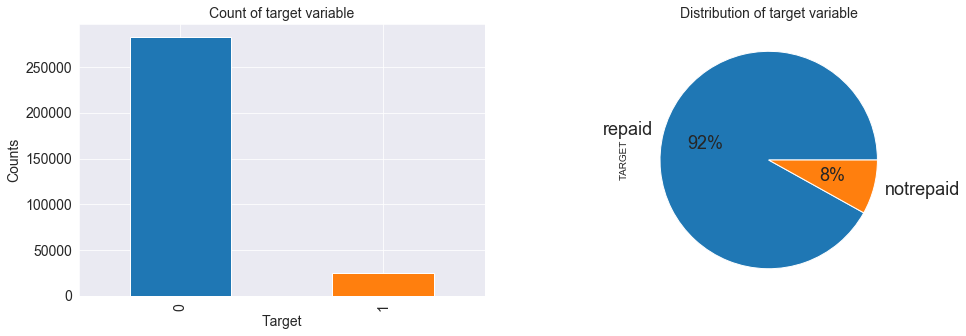

In [10]:
# calculating percentage of not repaid loan and ploting 

total_no_applicant = df_app_train['TARGET'].count()

total_repaid = df_app_train[df_app_train['TARGET']==0]['TARGET'].count()

total_not_repaid = df_app_train[df_app_train['TARGET']==1]['TARGET'].count()



start = "\033[1m"
end = "\033[0;0m"

print("Status of Target")
print("------------------")
print(f"total_no_applicant : {TxtFormat().BOLD} {total_no_applicant} {TxtFormat().END} ")
print(f"""total loan was repaid: {TxtFormat().BOLD} {total_repaid} {TxtFormat().END} and Percent :  {TxtFormat().BOLD} {round(total_repaid/total_no_applicant *100)} %  {TxtFormat().END} """)
print(f"total loan was not repaid: {TxtFormat().BOLD} {total_not_repaid} {TxtFormat().END} and Percent : {TxtFormat().BOLD} {round(total_not_repaid/total_no_applicant *100)} %  {TxtFormat().END} ")


# plot graph

fig , ax = plt.subplots(nrows=1,ncols=2,figsize=(16,5))
df_app_train['TARGET'].value_counts().plot(kind='bar' ,colors = sns.color_palette(), ax =ax[0], fontsize = 14 , label = '0: Repaid \n 1: Notrepaid')
ax[0].set_title("Count of target variable",fontsize = 14)
ax[0].set_ylabel("Counts", fontsize = 14)
ax[0].set_xlabel("Target",fontsize = 14)

df_app_train['TARGET'].value_counts().plot.pie(autopct = "%1.0f%%", colors = sns.color_palette(), labels = ['repaid','notrepaid'],fontsize =18 ,ax =ax[1])
ax[1].set_title("Distribution of target variable",fontsize = 14)

fig.savefig(" Target Level.png")

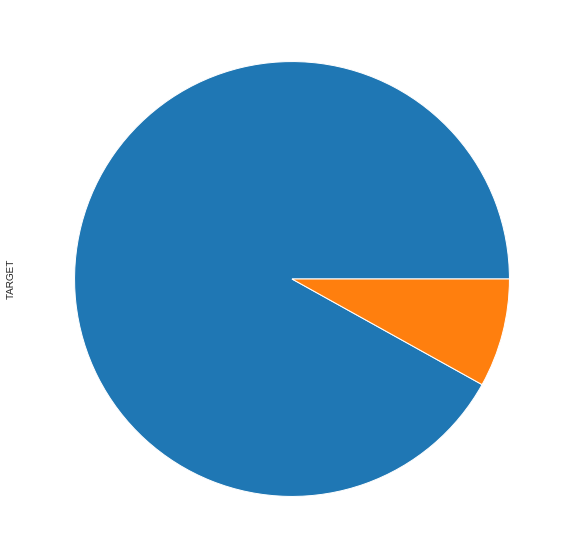

In [12]:
# calculating percentage of not repaid loan and ploting 

total_no_applicant = df_app_train['TARGET'].count()

total_repaid = df_app_train[df_app_train['TARGET']==0]['TARGET'].count()

total_not_repaid = df_app_train[df_app_train['TARGET']==1]['TARGET'].count()



# plot graph

plt.figure(figsize=(20,10))

df_app_train['TARGET'].value_counts().plot.pie(autopct = "", colors = sns.color_palette(), labels = ['',''],fontsize =18 )



#fig.savefig(" Target Level.png")

##  Test dummy model on Application data only

Here , Dummy model is created from only base on application dataframe to find out general information of client. It is also used for analysis features importance and other behaviour.

In [11]:
# select categorical datatype from application dataf
print(len(df_app_train.select_dtypes("object").columns))
X_cat = df_app_train.select_dtypes("object")
X_cat.head()

12


NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY NAME_TYPE_SUITE  \
0         Cash loans           M            N               Y   Unaccompanied   
1         Cash loans           F            N               N          Family   
2    Revolving loans           M            Y               Y   Unaccompanied   
3         Cash loans           F            N               Y   Unaccompanied   
4         Cash loans           M            N               Y   Unaccompanied   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START  \
0  House / apartment        Laborers                  WEDNESDAY   
1  House / apartment      Core staff                     MONDAY   
2  House / apartment        Laborers                     MONDAY   
3  House / apartment        Laborers                  WEDNESDAY   
4  House / apartment      Core staff                   THURSDAY   

        ORGANIZATION_TYPE  
0  Business Entity Type 3  
1                  School  
2              Government  
3  Business Entity Type 3  
4                Religion

In [12]:
# check missing values 

manage_df.missing_data_display(X_cat)

Total  Percent
ORGANIZATION_TYPE               0      0.0
WEEKDAY_APPR_PROCESS_START      0      0.0
OCCUPATION_TYPE                 0      0.0
NAME_HOUSING_TYPE               0      0.0
NAME_FAMILY_STATUS              0      0.0
NAME_EDUCATION_TYPE             0      0.0
NAME_INCOME_TYPE                0      0.0
NAME_TYPE_SUITE                 0      0.0
FLAG_OWN_REALTY                 0      0.0
FLAG_OWN_CAR                    0      0.0
CODE_GENDER                     0      0.0
NAME_CONTRACT_TYPE              0      0.0

In [13]:
# get dummy 
X_cat_dummy = pd.DataFrame(pd.get_dummies(X_cat,drop_first=True),index=X_cat.index)
print(X_cat_dummy.shape)
X_cat_dummy.head()

(307511, 114)


NAME_CONTRACT_TYPE_Revolving loans  CODE_GENDER_M  CODE_GENDER_XNA  \
0                                   0              1                0   
1                                   0              0                0   
2                                   1              1                0   
3                                   0              0                0   
4                                   0              1                0   

   FLAG_OWN_CAR_Y  FLAG_OWN_REALTY_Y  NAME_TYPE_SUITE_Family  \
0               0                  1                       0   
1               0                  0                       1   
2               1                  1                       0   
3               0                  1                       0   
4               0                  1                       0   

   NAME_TYPE_SUITE_Group of people  NAME_TYPE_SUITE_Other_A  \
0                                0                        0   
1                                0                        0   
2                                0                        0   
3                                0                        0   
4                                0                        0   

   NAME_TYPE_SUITE_Other_B  NAME_TYPE_SUITE_Spouse, partner  \
0                        0                                0   
1                        0                                0   
2                        0                                0   
3                        0                                0   
4                        0                                0   

   NAME_TYPE_SUITE_Unaccompanied  NAME_TYPE_SUITE_unknown  \
0                              1                        0   
1                              0                        0   
2                              1                        0   
3                              1                        0   
4                              1                        0   

   NAME_INCOME_TYPE_Commercial associate  NAME_INCOME_TYPE_Maternity leave  \
0                                      0                                 0   
1                                      0                                 0   
2                                      0                                 0   
3                                      0                                 0   
4                                      0                                 0   

   NAME_INCOME_TYPE_Pensioner  NAME_INCOME_TYPE_State servant  \
0                           0                               0   
1                           0                               1   
2                           0                               0   
3                           0                               0   
4                           0                               0   

   NAME_INCOME_TYPE_Student  NAME_INCOME_TYPE_Unemployed  \
0                         0                            0   
1                         0                            0   
2                         0                            0   
3                         0                            0   
4                         0                            0   

   NAME_INCOME_TYPE_Working  NAME_EDUCATION_TYPE_Higher education  \
0                         1                                     0   
1                         0                                     1   
2                         1                                     0   
3                         1                                     0   
4                         1                                     0   

   NAME_EDUCATION_TYPE_Incomplete higher  NAME_EDUCATION_TYPE_Lower secondary  \
0                                      0                                    0   
1                                      0                                    0   
2                                      0                                    0   
3                                      0                                    0   
4            

In [14]:
# Selecting numerical data for futher steps
X_num = df_app_train.select_dtypes(exclude="object")
print(X_num.shape,df_app_train.shape)
X_num.head()

(307511, 61) (307511, 73)


SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      100002       1             0          202500.0    406597.5   
1      100003       0             0          270000.0   1293502.5   
2      100004       0             0           67500.0    135000.0   
3      100006       0             0          135000.0    312682.5   
4      100007       0             0          121500.0    513000.0   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0      24700.5         351000.0                    0.018801       -9461   
1      35698.5        1129500.0                    0.003541      -16765   
2       6750.0         135000.0                    0.010032      -19046   
3      29686.5         297000.0                    0.008019      -19005   
4      21865.5         513000.0                    0.028663      -19932   

   DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
0           -637            -3648.0            -2120           1   
1          -1188            -1186.0             -291           1   
2           -225            -4260.0            -2531           1   
3          -3039            -9833.0            -2437           1   
4          -3038            -4311.0            -3458           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                0                 1           1           0   
2               1                1                 1           1           0   
3               1                0                 1           0           0   
4               1                0                 1           0           0   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0              1.0                     2                            2   
1              2.0                     1                            1   
2              1.0                     2                            2   
3              2.0                     2                            2   
4              1.0                     2                            2   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

   EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
0      0.262949      0.139376                       2.0   
1      0.622246      0.535276                       1.0   
2      0.555912      0.729567                       0.0   
3      0.650442      0.535276                       2.0   
4      0.322738      0.535276                       0.0   

   DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       0.0                       1.0   
2                       0.0                       0.0   
3                       0.0       

In [15]:
# checking 
manage_df.missing_data_display(X_num)

Total  Percent
AMT_REQ_CREDIT_BUREAU_YEAR      0      0.0
EXT_SOURCE_3                    0      0.0
LIVE_CITY_NOT_WORK_CITY         0      0.0
REG_CITY_NOT_WORK_CITY          0      0.0
REG_CITY_NOT_LIVE_CITY          0      0.0
...                           ...      ...
FLAG_DOCUMENT_2                 0      0.0
DAYS_LAST_PHONE_CHANGE          0      0.0
DEF_60_CNT_SOCIAL_CIRCLE        0      0.0
OBS_60_CNT_SOCIAL_CIRCLE        0      0.0
SK_ID_CURR                      0      0.0

[61 rows x 2 columns]

In [16]:
# simple overview of statistic info.
X_num.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307511.000000     3.075110e+05   
mean   5.990260e+05   27108.487841     5.383163e+05   
std    4.024908e+05   14493.461065     3.692890e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH     FLAG_MOBIL  FLAG_EMP_PHONE  \
count      307511.000000    307511.000000  307511.000000   307511.000000   
mean        -4986.120328     -2994.202373       0.999997        0.819889   
std          3522.886321      1509.450419       0.001803        0.384280   
min        -24672.000000     -7197.000000       0.000000        0.000000   
25%         -7479.500000     -4299.000000       1.000000        1.000000   
50%         -4504.000000     -3254.000000       1.000000        1.000000   
75%         -2010.000000     -1720.000000       1.000000        1.000000   
max             0.000000         0.000000       1.000000        1.000000   

       FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  \
count    307511.000000     307511.000000  307511.000000  307511.000000   
mean          0.199368          0.998133       0.281066       0.056720   
std           0.399526          0.043164       0.449521       0.231307   
min           0.000000          0.000000       0.000000       0.000000   
25%           0.000000          1.000000       0.000000       0.000000   
50%           0.000000          1.000000       0.000000       0.000000   
75%           0.000000          1.000000       1.000000       0.000000   
max           1.000000          1.000000       1.000000       1.000000   

       CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count    307511.000000         307511.000000                307511.000000   
mean          2.152664              2.052463                     2.031521   
std           0.910679              0.509034                     0.502737   
min           1.000000              1.000000                     1.000000   
25%           2.000000              2.000000                     2.000000   
50%           2.000000              2.000000                     2.000000   
75%           3.000000              2.000000                     2.000000   
max          20.000000              3.000000                     3.000000   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count            307511.000000               307511.000000   
mean                 12.063419                    0.015144   
std                   3.26583

In [17]:
# fill na by mean values 
X_num.fillna(X_num.mean(),inplace =True)

In [18]:
# check size of numerical dataframe and categorical dataframe 
print(X_num.shape,X_cat_dummy.shape)

(307511, 61) (307511, 114)


In [19]:
# merge numerical dataframe and categorical dataframe after get_dummies of categorical data 
X_final = X_num.merge(X_cat_dummy,left_index=True,right_index=True)
print(X_final.shape)
X_final.head()

(307511, 175)


SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      100002       1             0          202500.0    406597.5   
1      100003       0             0          270000.0   1293502.5   
2      100004       0             0           67500.0    135000.0   
3      100006       0             0          135000.0    312682.5   
4      100007       0             0          121500.0    513000.0   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0      24700.5         351000.0                    0.018801       -9461   
1      35698.5        1129500.0                    0.003541      -16765   
2       6750.0         135000.0                    0.010032      -19046   
3      29686.5         297000.0                    0.008019      -19005   
4      21865.5         513000.0                    0.028663      -19932   

   DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
0           -637            -3648.0            -2120           1   
1          -1188            -1186.0             -291           1   
2           -225            -4260.0            -2531           1   
3          -3039            -9833.0            -2437           1   
4          -3038            -4311.0            -3458           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                0                 1           1           0   
2               1                1                 1           1           0   
3               1                0                 1           0           0   
4               1                0                 1           0           0   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0              1.0                     2                            2   
1              2.0                     1                            1   
2              1.0                     2                            2   
3              2.0                     2                            2   
4              1.0                     2                            2   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

   EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
0      0.262949      0.139376                       2.0   
1      0.622246      0.535276                       1.0   
2      0.555912      0.729567                       0.0   
3      0.650442      0.535276                       2.0   
4      0.322738      0.535276                       0.0   

   DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       0.0                       1.0   
2                       0.0                       0.0   
3                       0.0       

In [22]:
# checking correlation top 10 features with target feature

manage_corr.target_corrs(X_final)[:10]

[('EXT_SOURCE_2', -0.16029475320996667),
 ('EXT_SOURCE_3', -0.15589168562406433),
 ('DAYS_BIRTH', 0.07823930830982712),
 ('REGION_RATING_CLIENT_W_CITY', 0.0608926675648237),
 ('REGION_RATING_CLIENT', 0.05889901494571248),
 ('NAME_INCOME_TYPE_Working', 0.05748118481836544),
 ('NAME_EDUCATION_TYPE_Higher education', -0.05659264414096392),
 ('DAYS_LAST_PHONE_CHANGE', 0.055218230125844474),
 ('CODE_GENDER_M', 0.05471268197127142),
 ('DAYS_ID_PUBLISH', 0.051457172607057504)]

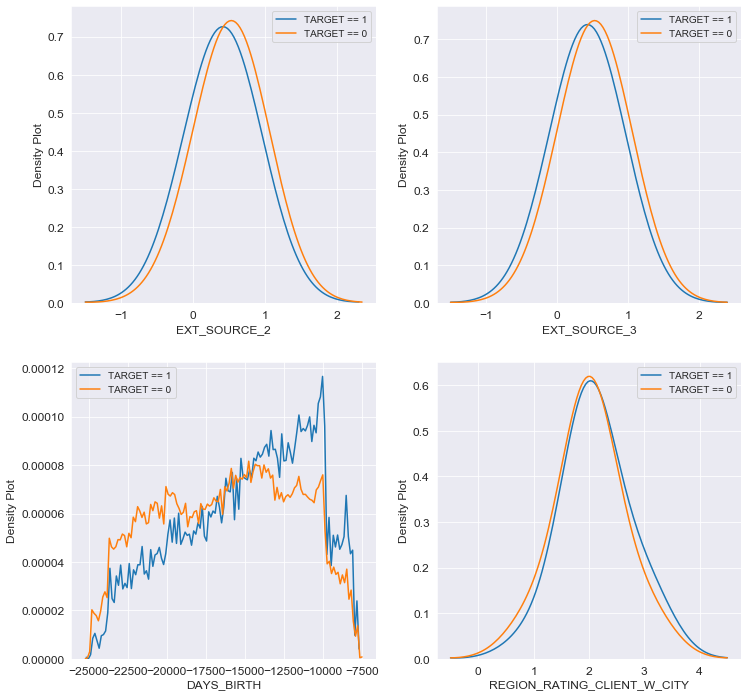

In [24]:
# EDA top 2 features 'EXT_SOURCE_2' and  

var = ['EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH','REGION_RATING_CLIENT_W_CITY']

plot_features.plot_distribution_comp(X_final,var,n_row=2)

In [25]:
# taking 30% of subset dataframe with balance subset for model 

X_subset = X_final.drop(columns=['TARGET'])
y_subset = X_final['TARGET']
X_train_subset , X_test_subset,y_train_subset,y_test_subset=train_test_split(X_subset,y_subset,test_size=0.3,stratify=y_subset,random_state=42)
print(X_test_subset.shape,y_test_subset.shape)

(92254, 174) (92254,)


In [26]:
# merge 30% subset data of features dataframe and target features 
X_final=X_test_subset.join(y_test_subset)
X_final.head()

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
199280      331034             0           90000.0    803259.0      23616.0   
122967      242581             0          270000.0   1288350.0      41692.5   
156663      281583             0          270000.0    253737.0      25227.0   
134382      255865             0          144000.0    436032.0      16564.5   
250108      389379             2           72000.0    225000.0      11250.0   

        AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
199280         670500.0                    0.008625      -19596   
122967        1125000.0                    0.008019      -13853   
156663         229500.0                    0.020246      -20895   
134382         360000.0                    0.018850      -18859   
250108         225000.0                    0.019101      -16521   

        DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
199280          -1873           -10088.0            -3130           1   
122967          -1070             -670.0            -4712           1   
156663          -1477            -5773.0            -4370           1   
134382           -916            -5972.0            -2416           1   
250108          -2786            -6337.0              -19           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
199280               1                1                 1           0   
122967               1                0                 1           0   
156663               1                0                 1           0   
134382               1                0                 1           1   
250108               1                0                 1           0   

        FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
199280           0              2.0                     2   
122967           0              2.0                     2   
156663           0              2.0                     3   
134382           0              2.0                     2   
250108           0              4.0                     2   

        REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
199280                            2                       16   
122967                            2                       13   
156663                            3                        8   
134382                            2                       12   
250108                            2                       16   

        REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
199280                           0                           0   
122967                           0                           0   
156663                           0                           0   
134382                           0                           0   
250108                           0                           0   

        LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
199280                            0                       0   
122967                            0                       0   
156663                            0                       0   
134382                            0                       0   
250108                            0                       1   

        REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_2  \
199280                       0                        0      0.592997   
122967                       0                        0      0.589525   
156663                       0                        0      0.552579   
134382                       0                        0      0.729623   
250108                       1                        0      0.155393   

        EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
199280      0.488455                       3.0                       0.0   
122967      0.216403                       2.0                       0.0   
156663      0.535276                       2.0           

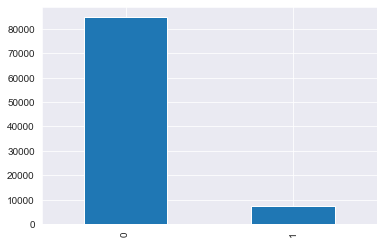

In [27]:
# check balance of target 
X_final['TARGET'].value_counts().plot(kind='bar')

In [28]:
# Prepare X_label and y_label ( features and target ) 

X = X_final.drop(columns=['TARGET','SK_ID_CURR'])
y= X_final['TARGET']

In [29]:
# split train dataframe and test data frame 
from  sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =.25,random_state = 23)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(69190, 173) (23064, 173)
(69190,) (23064,)


In [30]:
# Reduce dimension of dataframe by PCA
# Scalling for PCA 
ss = StandardScaler()

df_ss = pd.DataFrame(ss.fit_transform(X_train),columns=X_train.columns)

print(df_ss.shape)
df_ss.head()

(69190, 173)


CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0     -0.571370          0.511450    0.481174     2.473104         0.375199   
1     -0.571370         -0.092810   -0.951364    -0.869959        -0.994553   
2     -0.571370          0.310030    3.423200     2.422689         3.432683   
3      0.797647          1.719971    0.147572     0.605235         0.326280   
4     -0.571370         -0.576218   -0.368424     0.126447        -0.236298   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.313365    1.182177      -0.454459           1.068517   
1                    0.760663    0.514506      -0.494901          -0.106242   
2                   -0.307120    1.405267      -0.460332           0.066920   
3                    0.402462    0.044299      -0.452487          -0.992303   
4                    0.402462   -1.892815       2.140237           0.998054   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0         0.409488         0.0        0.467232        -0.501174   
1        -1.085675         0.0        0.467232        -0.501174   
2         0.290856         0.0        0.467232        -0.501174   
3        -1.057177         0.0        0.467232        -0.501174   
4         0.055580         0.0       -2.140266        -0.501174   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0          0.043051   -0.627250    4.106666        -1.257880   
1          0.043051    1.594261   -0.243507        -0.167477   
2          0.043051    1.594261   -0.243507        -0.167477   
3          0.043051   -0.627250   -0.243507         0.922926   
4          0.043051   -0.627250   -0.243507        -0.167477   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0             -0.104128                    -0.064184                -0.025067   
1             -0.104128                    -0.064184                -0.331332   
2             -0.104128                    -0.064184                -0.943862   
3             -0.104128                    -0.064184                -0.637597   
4             -0.104128                    -0.064184                 0.281198   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                   -0.124135                   -0.228804   
1                   -0.124135                   -0.228804   
2                   -0.124135                   -0.228804   
3                   -0.124135                   -0.228804   
4                   -0.124135                   -0.228804   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                    -0.202984                3.405295   
1                    -0.202984               -0.293660   
2                    -0.202984               -0.293660   
3                    -0.202984               -0.293660   
4                    -0.202984               -0.293660   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_2  \
0                1.817819                -0.468494     -0.488453   
1               -0.550110                -0.468494      0.640654   
2               -0.550110                -0.468494     -1.192345   
3               -0.550110                -0.468494      0.881766   
4               -0.550110                -0.468494      0.254312   

   EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0      1.012288                 -0.611479                 -0.323908   
1      0.959213                 -0.611479                 -0.323908   
2      0.887132                 -0.611479                 -0.323908   
3      0.093220                 -0.611479                 -0.323908   
4     -1.033569                 -0.611479                 -0.323908   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                 -0.609297                  -0.27969                1.162546   
1                 -0.609297                  -0.27969           

 Number of Components: 126


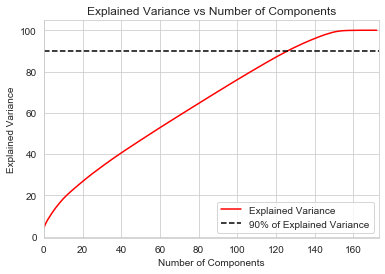

In [418]:
# finding no of components by PCA algorithm
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_ss)
cumsum = np.cumsum(pca.explained_variance_ratio_)*100
d = [n for n in range(len(cumsum))]
plt.figure(figsize=(6,4))
plt.plot(d, cumsum, color='red', label = 'Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.ylabel('Explained Variance')
plt.xlabel('Number of Components')
plt.axhline(y = 90, color='k', linestyle='--', label = '90% of Explained Variance')
plt.xlim(0,173)
plt.legend(loc='best');

print(' Number of Components:',(cumsum < 90).sum())

In [31]:
# for balancing target feature with oversampling by SMOTE class of imblearn library 
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
X_train,y_train = sm.fit_sample(X_train,y_train)
X_test,y_test = sm.fit_sample(X_test,y_test)





Using TensorFlow backend.


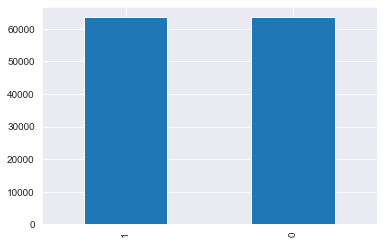

In [32]:
# checking balance
y_train.value_counts().plot(kind='bar')



### Modeling 

In [34]:
# Decision Tree
pipe_tree = Pipeline([('ss',StandardScaler()),
                 ('pca',PCA(n_components=126)),
                 ('tree_clf',DecisionTreeClassifier(criterion='gini',max_depth=5))])

pipe_tree.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('ss',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=126,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('tree_clf',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=5,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=None,
                                        splitter='best'))],

In [45]:
# Metrics of Decision tree
pred_tree = pipe_tree.predict(X_test)
print("\n")
print("Confusion Matrix ")
print("----------------\n")
print(confusion_matrix(y_test,pred_tree))
print("\n")
print("Classification Reports ")
print("----------------------\n")
print(classification_report(y_test,pred_tree))
print("\n")
print("Roc_auc_score ")
print("----------------\n")
print(roc_auc_score(y_test,pred_tree))



Confusion Matrix 
----------------

[[18436  2762]
 [ 3713 17485]]


Classification Reports 
----------------------

              precision    recall  f1-score   support

           0       0.83      0.87      0.85     21198
           1       0.86      0.82      0.84     21198

    accuracy                           0.85     42396
   macro avg       0.85      0.85      0.85     42396
weighted avg       0.85      0.85      0.85     42396



Roc_auc_score 
----------------

0.8472733276724219


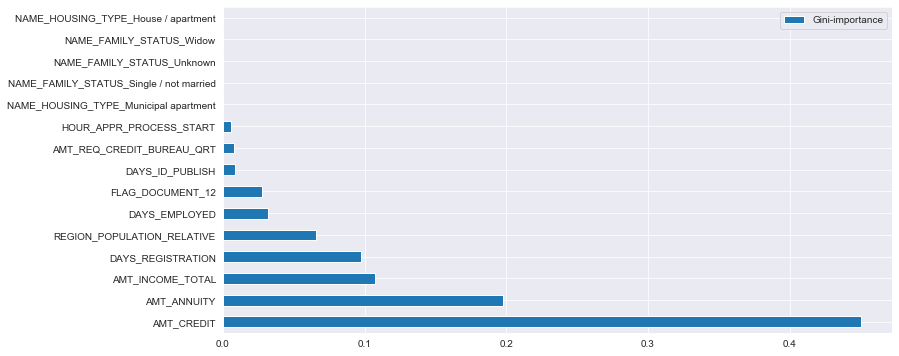

In [37]:
manage_model.plot_feature(pipe_tree[2],X_train)   

#### Light Gradient Boosting Algorithm

In [46]:
#lgbm = lgb.LGBMClassifier()

pipe_lgbm = Pipeline([('ss',StandardScaler()),
                    ('pca',PCA(n_components=126)),
                 ('lgbm',lgb.LGBMClassifier())])
                 
pipe_lgbm.fit(X_train,y_train)   

# accuracy
print("Train score : ", pipe_lgbm.score(X_train,y_train))
print("test score :",pipe_lgbm.score(X_test,y_test))



Train score :  0.9474830210036473
test score : 0.9388857439381074


In [47]:
# confusion metrix for RandomForest 

pred_lgbm = pipe_lgbm.predict(X_test)
print("\n")
print("Confusion Matrix ")
print("------------------ \n ")
print(confusion_matrix(y_test,pred_lgbm))
print("\n")
print("\n Classification Report  ")
print("---------------------------- \n")
print(classification_report(y_test,pred_lgbm))
print("\n")
print(" Roc_auc_score :")
print("------------------ \n")
print(roc_auc_score(y_test,pred_lgbm))



Confusion Matrix 
------------------ 
 
[[20873   325]
 [ 2266 18932]]



 Classification Report  
---------------------------- 

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     21198
           1       0.98      0.89      0.94     21198

    accuracy                           0.94     42396
   macro avg       0.94      0.94      0.94     42396
weighted avg       0.94      0.94      0.94     42396



 Roc_auc_score :
------------------ 

0.9388857439381074


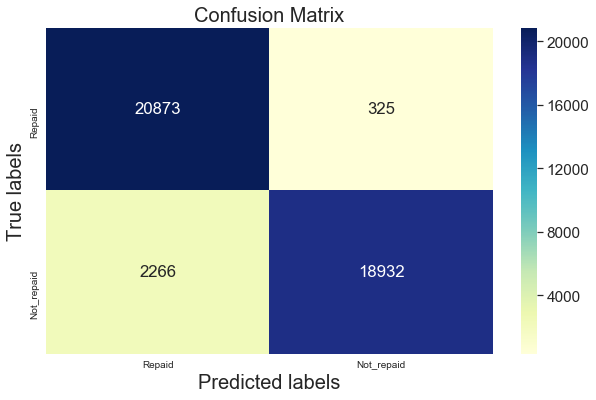

<Figure size 432x288 with 0 Axes>

In [48]:
# Confusion matrix of LightGBM

plt.figure(figsize = (10,6))  # figure size
ax = plt.subplot()
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix(y_test,pred_lgbm),annot=True,fmt='g',ax =ax , xticklabels= ['Repaid', 'Not_repaid'] ,
            yticklabels=['Repaid','Not_repaid'],cmap ='YlGnBu' )

# subplot
ax.set_xlabel("Predicted labels" , fontsize = 20 );ax.set_ylabel("True labels" , fontsize = 20 )
ax.set_title("Confusion Matrix", fontsize = 20)
#ax.xaxis.set_ticklabels(['Repaid', 'Not_repaid'], fontsize = 14); 
#ax.yaxis.set_ticklabels(['Repaid','Not_repaid'], fontsize = 14);

plt.show()
plt.savefig("Confusion_matrix_lgbm.png")


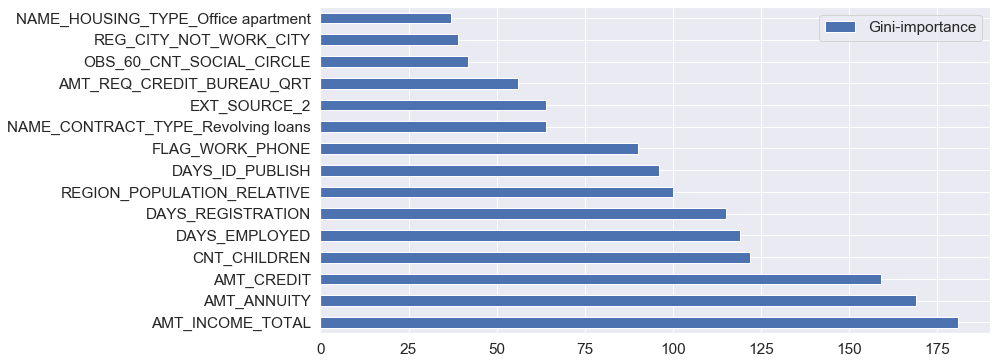

In [49]:
# plot top importance features from Light Gradient Boosting
manage_model.plot_feature(pipe_lgbm[2],X_train) 

#### RandomForest 

In [40]:
# Random Forest 
pipe_rf = Pipeline([('ss',StandardScaler()),
                 ('pca',PCA(n_components=126)),
                 ('rf',RandomForestClassifier(n_estimators=100,max_depth=5))])

pipe_rf.fit(X_train,y_train)


Pipeline(memory=None,
         steps=[('ss',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=126,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('rf',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=5, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,

In [50]:
# confusion metrix for RandomForest 

pred_rf = pipe_rf.predict(X_test)
print("\n")
print("Confusion Matrix ")
print("------------------ \n ")
print(confusion_matrix(y_test,pred_rf))
print("\n")
print("\n Classification Report  ")
print("---------------------------- \n")
print(classification_report(y_test,pred_rf))
print("\n")
print(" Roc_auc_score :")
print("------------------ \n")
print(roc_auc_score(y_test,pred_rf))



Confusion Matrix 
------------------ 
 
[[20124  1074]
 [ 3012 18186]]



 Classification Report  
---------------------------- 

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     21198
           1       0.94      0.86      0.90     21198

    accuracy                           0.90     42396
   macro avg       0.91      0.90      0.90     42396
weighted avg       0.91      0.90      0.90     42396



 Roc_auc_score :
------------------ 

0.9036229833003114


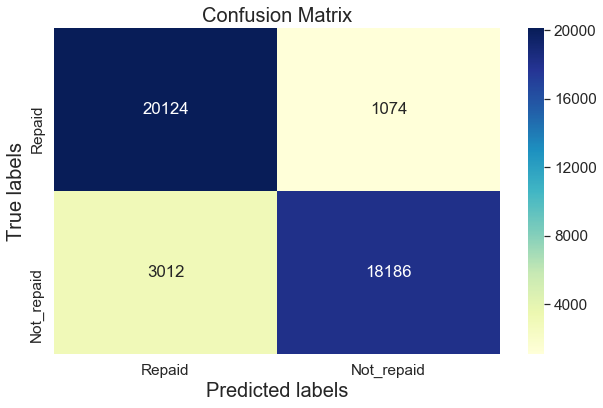

<Figure size 432x288 with 0 Axes>

In [52]:
# Confusion matrix of RandomForest

plt.figure(figsize = (10,6))  # figure size
ax = plt.subplot()
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix(y_test,pred_rf),annot=True,fmt='g',ax =ax , xticklabels= ['Repaid', 'Not_repaid'] ,
            yticklabels=['Repaid','Not_repaid'],cmap ='YlGnBu' )

# subplot
ax.set_xlabel("Predicted labels" , fontsize = 20 );ax.set_ylabel("True labels" , fontsize = 20 )
ax.set_title("Confusion Matrix", fontsize = 20)
#ax.xaxis.set_ticklabels(['Repaid', 'Not_repaid'], fontsize = 14); 
#ax.yaxis.set_ticklabels(['Repaid','Not_repaid'], fontsize = 14);

plt.show()
plt.savefig("Confusion_matrix_lgbm.png")

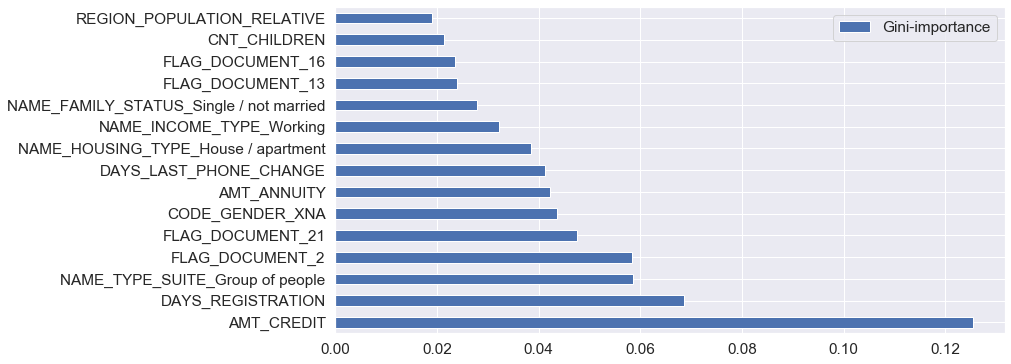

In [53]:
# plot importance features from RandomForest  

manage_model.plot_feature(pipe_rf[2],X_train)

In [178]:
# optimization of randomForest

# RandomForest 
pipe_rf = Pipeline([('sc',StandardScaler()),
                 ('pca',PCA(n_components=242)),
                 ('rf',RandomForestClassifier(random_state=123))])


# create the grid parameter
n_estimators = [100, 300,400]
max_depth = [5, 8]
min_samples_split = [2, 5,8]
min_samples_leaf = [ 5, 10,15]

grid = [{'rf__n_estimators':n_estimators,
          'rf__max_depth':max_depth,
          'rf__min_samples_split':min_samples_split,
          'rf__min_samples_leaf':min_samples_leaf}]


gridsearch  = GridSearchCV(estimator=pipe_rf,param_grid=grid,scoring='accuracy',cv=3)
gridsearch.fit(X_train,y_train)


print("Best Parameter " )
print("-----------------\n")
print(gridsearch.best_params_)

print("\n")
print("Best Score ")
print("-----------\n")
print(gridsearch.best_score_)

## Final Model on prepared data which is merged by all dataframe

Here , train_bureau.csv and previous_loan_final.csv which are generated on part 1 and part 2 are merged for making whole dataframe named home_credit_final.csv. It is used for final model and prediction client's repayment abilities . Final dataframe has all information of client where are previous loan of another institute(credit bureau) and same institute. 

In [57]:
# retrive data which is made already from part 1 where it is made by joining application_train , bureau , bureau_balance 
df_app_bureau = pd.read_csv("Data/train_bureau.csv",)
print(df_app_bureau.shape)
df_app_bureau = df_app_bureau.iloc[:,1:]
df_app_bureau.head()

(307511, 751)


SK_ID_CURR  train_CNT_CHILDREN_count  train_CNT_CHILDREN_mean  \
0      100002                         1                        0   
1      100003                         1                        0   
2      100004                         1                        0   
3      100006                         1                        0   
4      100007                         1                        0   

   train_CNT_CHILDREN_max  train_CNT_CHILDREN_min  train_CNT_CHILDREN_sum  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   train_AMT_INCOME_TOTAL_count  train_AMT_INCOME_TOTAL_mean  \
0                             1                     202500.0   
1                             1                     270000.0   
2                             1                      67500.0   
3                             1                     135000.0   
4                             1                     121500.0   

   train_AMT_INCOME_TOTAL_max  train_AMT_INCOME_TOTAL_min  \
0                    202500.0                    202500.0   
1                    270000.0                    270000.0   
2                     67500.0                     67500.0   
3                    135000.0                    135000.0   
4                    121500.0                    121500.0   

   train_AMT_INCOME_TOTAL_sum  train_AMT_CREDIT_count  train_AMT_CREDIT_mean  \
0                    202500.0                       1               406597.5   
1                    270000.0                       1              1293502.5   
2                     67500.0                       1               135000.0   
3                    135000.0                       1               312682.5   
4                    121500.0                       1               513000.0   

   train_AMT_CREDIT_max  train_AMT_CREDIT_min  train_AMT_CREDIT_sum  \
0              406597.5              406597.5              406597.5   
1             1293502.5             1293502.5             1293502.5   
2              135000.0              135000.0              135000.0   
3              312682.5              312682.5              312682.5   
4              513000.0              513000.0              513000.0   

   train_AMT_ANNUITY_count  train_AMT_ANNUITY_mean  train_AMT_ANNUITY_max  \
0                        1                 24700.5                24700.5   
1                        1                 35698.5                35698.5   
2                        1                  6750.0                 6750.0   
3                        1                 29686.5                29686.5   
4                        1                 21865.5                21865.5   

   train_AMT_ANNUITY_min  train_AMT_ANNUITY_sum  train_AMT_GOODS_PRICE_count  \
0                24700.5                24700.5                            1   
1                35698.5                35698.5                            1   
2                 6750.0                 6750.0                            1   
3                29686.5                29686.5                            1   
4                21865.5                21865.5                            1   

   train_AMT_GOODS_PRICE_mean  train_AMT_GOODS_PRICE_max  \
0                    351000.0                   351000.0   
1                   1129500.0                  1129500.0   
2                    135000.0                   135000.0   
3                    297000.0                   297000.0   
4                    513000.0                   513000.0   

   train_AMT_GOODS_PRICE_min  train_AMT_GOODS_PRICE_sum  \
0                   351000.0                   351000.0   
1                  1129500.0                  11

In [4]:
# Getting data from previous loan

df_previous_loan = pd.read_csv("Data/previou_loan_final.csv")
print(df_previous_loan.shape)
df_previous_loan.head()

(338857, 507)


SK_ID_CURR  previous_AMT_ANNUITY_count  previous_AMT_ANNUITY_mean  \
0      100001                           1                 3951.00000   
1      100002                           1                 9251.77500   
2      100003                           3                56553.99000   
3      100004                           1                 5357.25000   
4      100005                           2                10384.16033   

   previous_AMT_ANNUITY_max  previous_AMT_ANNUITY_min  \
0               3951.000000                  3951.000   
1               9251.775000                  9251.775   
2              98356.995000                  6737.310   
3               5357.250000                  5357.250   
4              15955.120659                  4813.200   

   previous_AMT_ANNUITY_sum  previous_AMT_APPLICATION_count  \
0               3951.000000                               1   
1               9251.775000                               1   
2             169661.970000                               3   
3               5357.250000                               1   
4              20768.320659                               2   

   previous_AMT_APPLICATION_mean  previous_AMT_APPLICATION_max  \
0                       24835.50                       24835.5   
1                      179055.00                      179055.0   
2                      435436.50                      900000.0   
3                       24282.00                       24282.0   
4                       22308.75                       44617.5   

   previous_AMT_APPLICATION_min  ...  payment_AMT_INSTALMENT_count  \
0                       24835.5  ...                           7.0   
1                      179055.0  ...                          19.0   
2                       68809.5  ...                          25.0   
3                       24282.0  ...                           3.0   
4                           0.0  ...                           9.0   

   payment_AMT_INSTALMENT_mean  payment_AMT_INSTALMENT_max  \
0                  5885.132143                   17397.900   
1                 11559.247105                   53093.745   
2                 64754.586000                  560835.360   
3                  7096.155000                   10573.965   
4                  6240.205000                   17656.245   

   payment_AMT_INSTALMENT_min  payment_AMT_INSTALMENT_sum  \
0                    3951.000                   41195.925   
1                    9251.775                  219625.695   
2                    6662.970                 1618864.650   
3                    5357.250                   21288.465   
4                    4813.200                   56161.845   

   payment_AMT_PAYMENT_count  payment_AMT_PAYMENT_mean  \
0                        7.0               5885.132143   
1                       19.0              11559.247105   
2                       25.0              64754.586000   
3                        3.0               7096.155000   
4                        9.0               6240.205000   

   payment_AMT_PAYMENT_max  payment_AMT_PAYMENT_min  payment_AMT_PAYMENT_sum  
0                17397.900                 3951.000                41195.925  
1                53093.745                 9251.775               219625.695  
2               560835.360                 6662.970              1618864.650  
3                10573.965                 5357.250                21288.465  
4                17656.245                 4813.200                56161.845  

[5 rows x 507 columns]

In [5]:
# merging df_app_bureau and df_previous_loan_fina dataframe for making final dataframe 

df_home_final = df_app_bureau.merge(df_previous_loan,on='SK_ID_CURR',how='left')
print(df_home_final.shape)
df_home_final.head()

(307511, 1256)


SK_ID_CURR  train_CNT_CHILDREN_count  train_CNT_CHILDREN_mean  \
0      100002                         1                        0   
1      100003                         1                        0   
2      100004                         1                        0   
3      100006                         1                        0   
4      100007                         1                        0   

   train_CNT_CHILDREN_max  train_CNT_CHILDREN_min  train_CNT_CHILDREN_sum  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   train_AMT_INCOME_TOTAL_count  train_AMT_INCOME_TOTAL_mean  \
0                             1                     202500.0   
1                             1                     270000.0   
2                             1                      67500.0   
3                             1                     135000.0   
4                             1                     121500.0   

   train_AMT_INCOME_TOTAL_max  train_AMT_INCOME_TOTAL_min  ...  \
0                    202500.0                    202500.0  ...   
1                    270000.0                    270000.0  ...   
2                     67500.0                     67500.0  ...   
3                    135000.0                    135000.0  ...   
4                    121500.0                    121500.0  ...   

   payment_AMT_INSTALMENT_count  payment_AMT_INSTALMENT_mean  \
0                          19.0                 11559.247105   
1                          25.0                 64754.586000   
2                           3.0                  7096.155000   
3                          16.0                 62947.088438   
4                          66.0                 12666.444545   

   payment_AMT_INSTALMENT_max  payment_AMT_INSTALMENT_min  \
0                   53093.745                    9251.775   
1                  560835.360                    6662.970   
2                   10573.965                    5357.250   
3                  691786.890                    2482.920   
4                   22678.785                    1821.780   

   payment_AMT_INSTALMENT_sum  payment_AMT_PAYMENT_count  \
0                  219625.695                       19.0   
1                 1618864.650                       25.0   
2                   21288.465                        3.0   
3                 1007153.415                       16.0   
4                  835985.340                       66.0   

   payment_AMT_PAYMENT_mean  payment_AMT_PAYMENT_max  payment_AMT_PAYMENT_min  \
0              11559.247105                53093.745                 9251.775   
1              64754.586000               560835.360                 6662.970   
2               7096.155000                10573.965                 5357.250   
3              62947.088438               691786.890                 2482.920   
4              12214.060227                22678.785                    0.180   

   payment_AMT_PAYMENT_sum  
0               219625.695  
1              1618864.650  
2                21288.465  
3              1007153.415  
4               806127.975  

[5 rows x 1256 columns]

In [6]:
# Save final data of app_bureu and previous 

df_home_final.to_csv("Data/home_credit_final.csv",index=False)


In [59]:
# delete dataframe from memory

del df_app_bureau

## Data retriving from saved  csv file for further steps 

In [13]:
# getting final mergred final data 

df_home_final = pd.read_csv("Data/home_credit_final.csv")
print(df_home_final.shape)
df_home_final.head()

(307511, 1256)


SK_ID_CURR  train_CNT_CHILDREN_count  train_CNT_CHILDREN_mean  \
0      100002                         1                        0   
1      100003                         1                        0   
2      100004                         1                        0   
3      100006                         1                        0   
4      100007                         1                        0   

   train_CNT_CHILDREN_max  train_CNT_CHILDREN_min  train_CNT_CHILDREN_sum  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   train_AMT_INCOME_TOTAL_count  train_AMT_INCOME_TOTAL_mean  \
0                             1                     202500.0   
1                             1                     270000.0   
2                             1                      67500.0   
3                             1                     135000.0   
4                             1                     121500.0   

   train_AMT_INCOME_TOTAL_max  train_AMT_INCOME_TOTAL_min  \
0                    202500.0                    202500.0   
1                    270000.0                    270000.0   
2                     67500.0                     67500.0   
3                    135000.0                    135000.0   
4                    121500.0                    121500.0   

   train_AMT_INCOME_TOTAL_sum  train_AMT_CREDIT_count  train_AMT_CREDIT_mean  \
0                    202500.0                       1               406597.5   
1                    270000.0                       1              1293502.5   
2                     67500.0                       1               135000.0   
3                    135000.0                       1               312682.5   
4                    121500.0                       1               513000.0   

   train_AMT_CREDIT_max  train_AMT_CREDIT_min  train_AMT_CREDIT_sum  \
0              406597.5              406597.5              406597.5   
1             1293502.5             1293502.5             1293502.5   
2              135000.0              135000.0              135000.0   
3              312682.5              312682.5              312682.5   
4              513000.0              513000.0              513000.0   

   train_AMT_ANNUITY_count  train_AMT_ANNUITY_mean  train_AMT_ANNUITY_max  \
0                        1                 24700.5                24700.5   
1                        1                 35698.5                35698.5   
2                        1                  6750.0                 6750.0   
3                        1                 29686.5                29686.5   
4                        1                 21865.5                21865.5   

   train_AMT_ANNUITY_min  train_AMT_ANNUITY_sum  train_AMT_GOODS_PRICE_count  \
0                24700.5                24700.5                            1   
1                35698.5                35698.5                            1   
2                 6750.0                 6750.0                            1   
3                29686.5                29686.5                            1   
4                21865.5                21865.5                            1   

   train_AMT_GOODS_PRICE_mean  train_AMT_GOODS_PRICE_max  \
0                    351000.0                   351000.0   
1                   1129500.0                  1129500.0   
2                    135000.0                   135000.0   
3                    297000.0                   297000.0   
4                    513000.0                   513000.0   

   train_AMT_GOODS_PRICE_min  train_AMT_GOODS_PRICE_sum  \
0                   351000.0                   351000.0   
1                  1129500.0                  11

In [14]:
# check null value 

manage_df.missing_data_display(df_home_final)

Total    Percent
credit_AMT_DRAWINGS_OTHER_CURRENT_count             221310  71.968157
credit_AMT_PAYMENT_CURRENT_sum                      221310  71.968157
credit_AMT_RECEIVABLE_PRINCIPAL_count               221310  71.968157
credit_AMT_PAYMENT_TOTAL_CURRENT_sum                221310  71.968157
credit_AMT_PAYMENT_TOTAL_CURRENT_min                221310  71.968157
...                                                    ...        ...
train_NAME_HOUSING_TYPE_House / apartment_count...       0   0.000000
train_NAME_HOUSING_TYPE_Municipal apartment_count        0   0.000000
train_NAME_HOUSING_TYPE_Municipal apartment_cou...       0   0.000000
train_NAME_HOUSING_TYPE_Office apartment_count           0   0.000000
SK_ID_CURR                                               0   0.000000

[1256 rows x 2 columns]

In [15]:
# copy from original 
df_home_final_update = df_home_final.copy()

In [16]:
# delete columns which has more than 40% and check null values

manage_df.delete_missing_values(df_home_final_update)
manage_df.missing_data_display(df_home_final_update)

Total   Percent
pos_cash_SK_DPD_mean                                19234  6.254736
pos_cash_NAME_CONTRACT_STATUS_Amortized debt_co...  19234  6.254736
pos_cash_SK_DPD_DEF_max                             19234  6.254736
pos_cash_SK_DPD_DEF_min                             19234  6.254736
pos_cash_SK_DPD_DEF_sum                             19234  6.254736
...                                                   ...       ...
train_NAME_HOUSING_TYPE_House / apartment_count...      0  0.000000
train_NAME_HOUSING_TYPE_Municipal apartment_count       0  0.000000
train_NAME_HOUSING_TYPE_Municipal apartment_cou...      0  0.000000
train_NAME_HOUSING_TYPE_Office apartment_count          0  0.000000
SK_ID_CURR                                              0  0.000000

[941 rows x 2 columns]

In [7]:
# check null values
# manage_df.missing_data_display(df_home_final_update).head(30)

Total   Percent
pos_cash_SK_DPD_mean                                19234  6.254736
pos_cash_NAME_CONTRACT_STATUS_Amortized debt_co...  19234  6.254736
pos_cash_SK_DPD_DEF_max                             19234  6.254736
pos_cash_SK_DPD_DEF_min                             19234  6.254736
pos_cash_SK_DPD_DEF_sum                             19234  6.254736
pos_cash_NAME_CONTRACT_STATUS_Active_count          19234  6.254736
pos_cash_NAME_CONTRACT_STATUS_Active_count_norm     19234  6.254736
pos_cash_NAME_CONTRACT_STATUS_Amortized debt_count  19234  6.254736
pos_cash_NAME_CONTRACT_STATUS_XNA_count_norm        19234  6.254736
pos_cash_NAME_CONTRACT_STATUS_XNA_count             19234  6.254736
pos_cash_NAME_CONTRACT_STATUS_Signed_count_norm     19234  6.254736
pos_cash_NAME_CONTRACT_STATUS_Signed_count          19234  6.254736
pos_cash_NAME_CONTRACT_STATUS_Returned to the s...  19234  6.254736
pos_cash_NAME_CONTRACT_STATUS_Returned to the s...  19234  6.254736
pos_cash_NAME_CONTRACT_STATUS_Demand_count_norm     19234  6.254736
pos_cash_NAME_CONTRACT_STATUS_Demand_count          19234  6.254736
pos_cash_NAME_CONTRACT_STATUS_Completed_count_norm  19234  6.254736
pos_cash_NAME_CONTRACT_STATUS_Completed_count       19234  6.254736
pos_cash_NAME_CONTRACT_STATUS_Canceled_count_norm   19234  6.254736
pos_cash_NAME_CONTRACT_STATUS_Canceled_count        19234  6.254736
pos_cash_NAME_CONTRACT_STATUS_Approved_count_norm   19234  6.254736
pos_cash_SK_DPD_DEF_mean                            19234  6.254736
pos_cash_SK_DPD_DEF_count                           19234  6.254736
pos_cash_SK_DPD_sum                                 19234  6.254736
pos_cash_SK_DPD_min                                 19234  6.254736
pos_cash_MONTHS_BALANCE_count                       19234  6.254736
pos_cash_MONTHS_BALANCE_mean                        19234  6.254736
pos_cash_MONTHS_BALANCE_max                         19234  6.254736
pos_cash_MONTHS_BALANCE_min                         19234  6.254736
pos_cash_MONTHS_BALANCE_sum                         19234  6.254736

In [17]:
# delete rows because it's 6.2% only null values

df_home_final_update.dropna(inplace = True)

In [18]:
# check null values
manage_df.missing_data_display(df_home_final_update)

Total  Percent
payment_AMT_PAYMENT_sum                                 0      0.0
train_FLAG_OWN_CAR_N_count_norm                         0      0.0
train_NAME_TYPE_SUITE_Group of people_count_norm        0      0.0
train_NAME_TYPE_SUITE_Group of people_count             0      0.0
train_NAME_TYPE_SUITE_Family_count_norm                 0      0.0
...                                                   ...      ...
previous_NAME_CASH_LOAN_PURPOSE_Business develo...      0      0.0
previous_NAME_CASH_LOAN_PURPOSE_Building a hous...      0      0.0
previous_NAME_CASH_LOAN_PURPOSE_Building a hous...      0      0.0
previous_FLAG_LAST_APPL_PER_CONTRACT_Y_count_norm       0      0.0
SK_ID_CURR                                              0      0.0

[941 rows x 2 columns]

In [19]:
# check dimension of final dataframe 

print(df_home_final_update.shape)
df_home_final_update.head()

(288028, 941)


SK_ID_CURR  train_CNT_CHILDREN_count  train_CNT_CHILDREN_mean  \
0      100002                         1                        0   
1      100003                         1                        0   
2      100004                         1                        0   
3      100006                         1                        0   
4      100007                         1                        0   

   train_CNT_CHILDREN_max  train_CNT_CHILDREN_min  train_CNT_CHILDREN_sum  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   train_AMT_INCOME_TOTAL_count  train_AMT_INCOME_TOTAL_mean  \
0                             1                     202500.0   
1                             1                     270000.0   
2                             1                      67500.0   
3                             1                     135000.0   
4                             1                     121500.0   

   train_AMT_INCOME_TOTAL_max  train_AMT_INCOME_TOTAL_min  \
0                    202500.0                    202500.0   
1                    270000.0                    270000.0   
2                     67500.0                     67500.0   
3                    135000.0                    135000.0   
4                    121500.0                    121500.0   

   train_AMT_INCOME_TOTAL_sum  train_AMT_CREDIT_count  train_AMT_CREDIT_mean  \
0                    202500.0                       1               406597.5   
1                    270000.0                       1              1293502.5   
2                     67500.0                       1               135000.0   
3                    135000.0                       1               312682.5   
4                    121500.0                       1               513000.0   

   train_AMT_CREDIT_max  train_AMT_CREDIT_min  train_AMT_CREDIT_sum  \
0              406597.5              406597.5              406597.5   
1             1293502.5             1293502.5             1293502.5   
2              135000.0              135000.0              135000.0   
3              312682.5              312682.5              312682.5   
4              513000.0              513000.0              513000.0   

   train_AMT_ANNUITY_count  train_AMT_ANNUITY_mean  train_AMT_ANNUITY_max  \
0                        1                 24700.5                24700.5   
1                        1                 35698.5                35698.5   
2                        1                  6750.0                 6750.0   
3                        1                 29686.5                29686.5   
4                        1                 21865.5                21865.5   

   train_AMT_ANNUITY_min  train_AMT_ANNUITY_sum  train_AMT_GOODS_PRICE_count  \
0                24700.5                24700.5                            1   
1                35698.5                35698.5                            1   
2                 6750.0                 6750.0                            1   
3                29686.5                29686.5                            1   
4                21865.5                21865.5                            1   

   train_AMT_GOODS_PRICE_mean  train_AMT_GOODS_PRICE_max  \
0                    351000.0                   351000.0   
1                   1129500.0                  1129500.0   
2                    135000.0                   135000.0   
3                    297000.0                   297000.0   
4                    513000.0                   513000.0   

   train_AMT_GOODS_PRICE_min  train_AMT_GOODS_PRICE_sum  \
0                   351000.0                   351000.0   
1                  1129500.0                  11

In [62]:
# check correlation target between features
manage_corr.target_corrs(df_home_final_update)[:10]

[('previous_NAME_CONTRACT_STATUS_Refused_count_norm', 0.07864439687733489),
 ('previous_CODE_REJECT_REASON_XAP_count_norm', -0.07511676895797632),
 ('previous_NAME_CONTRACT_STATUS_Refused_count', 0.06458342506013925),
 ('previous_NAME_CONTRACT_STATUS_Approved_count_norm', -0.06409990849717513),
 ('payment_DAYS_INSTALMENT_min', 0.05705745220517007),
 ('previous_CODE_REJECT_REASON_SCOFR_count', 0.055882011976770604),
 ('previous_CODE_REJECT_REASON_HC_count_norm', 0.05566110735985865),
 ('previous_CODE_REJECT_REASON_SCOFR_count_norm', 0.05538994480355518),
 ('previous_DAYS_DECISION_min', 0.05185721543981554),
 ('train_ORGANIZATION_TYPE_XNA_count', -0.04741542098593257)]

The correlation between previous_NAME_CONTRACT_STATUS_Refused_count_norm and the TARGET is 0.0786
Median value for loan that was not repaid = 0.0000
Median value for loan that was repaid = 0.0000


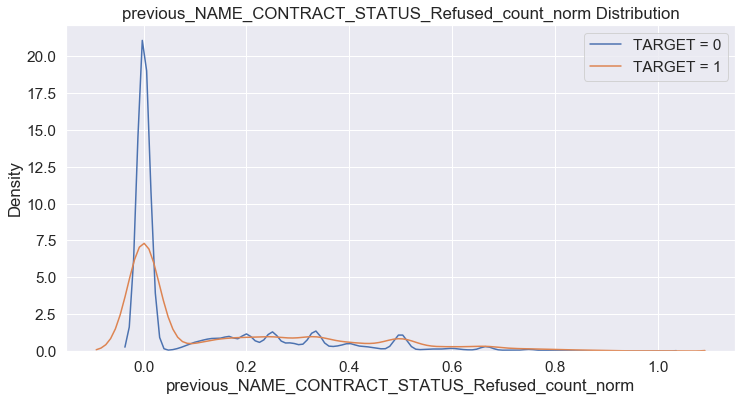

In [63]:
# plot kde target with top feature previous_NAME_CONTRACT_STATUS_Refused_count_norm
manage_corr.Kde_target('previous_NAME_CONTRACT_STATUS_Refused_count_norm',df_home_final_update)

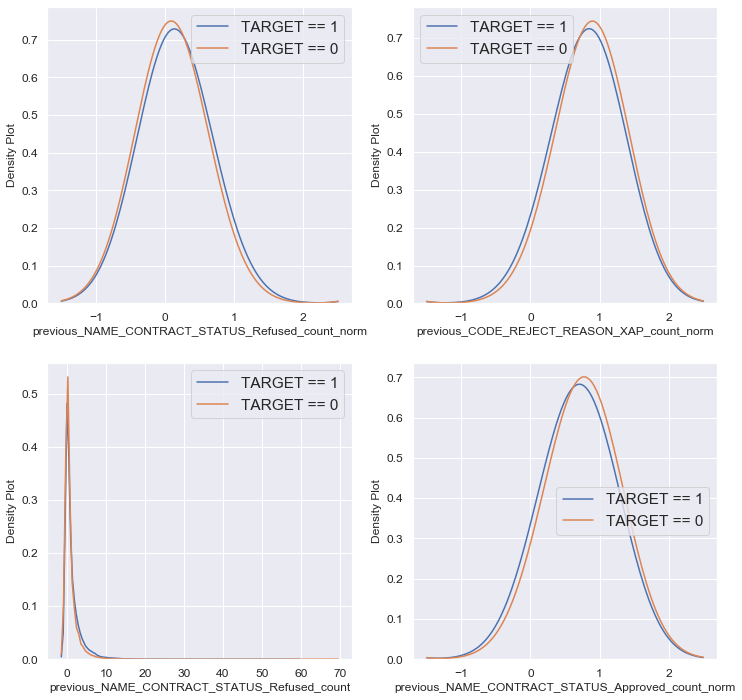

In [65]:
# compare top four features with target 
feature_vars = ['previous_NAME_CONTRACT_STATUS_Refused_count_norm','previous_CODE_REJECT_REASON_XAP_count_norm',
                'previous_NAME_CONTRACT_STATUS_Refused_count','previous_NAME_CONTRACT_STATUS_Approved_count_norm']

plot_features.plot_distribution_comp(df=df_home_final_update,list_features=feature_vars,n_row=2)

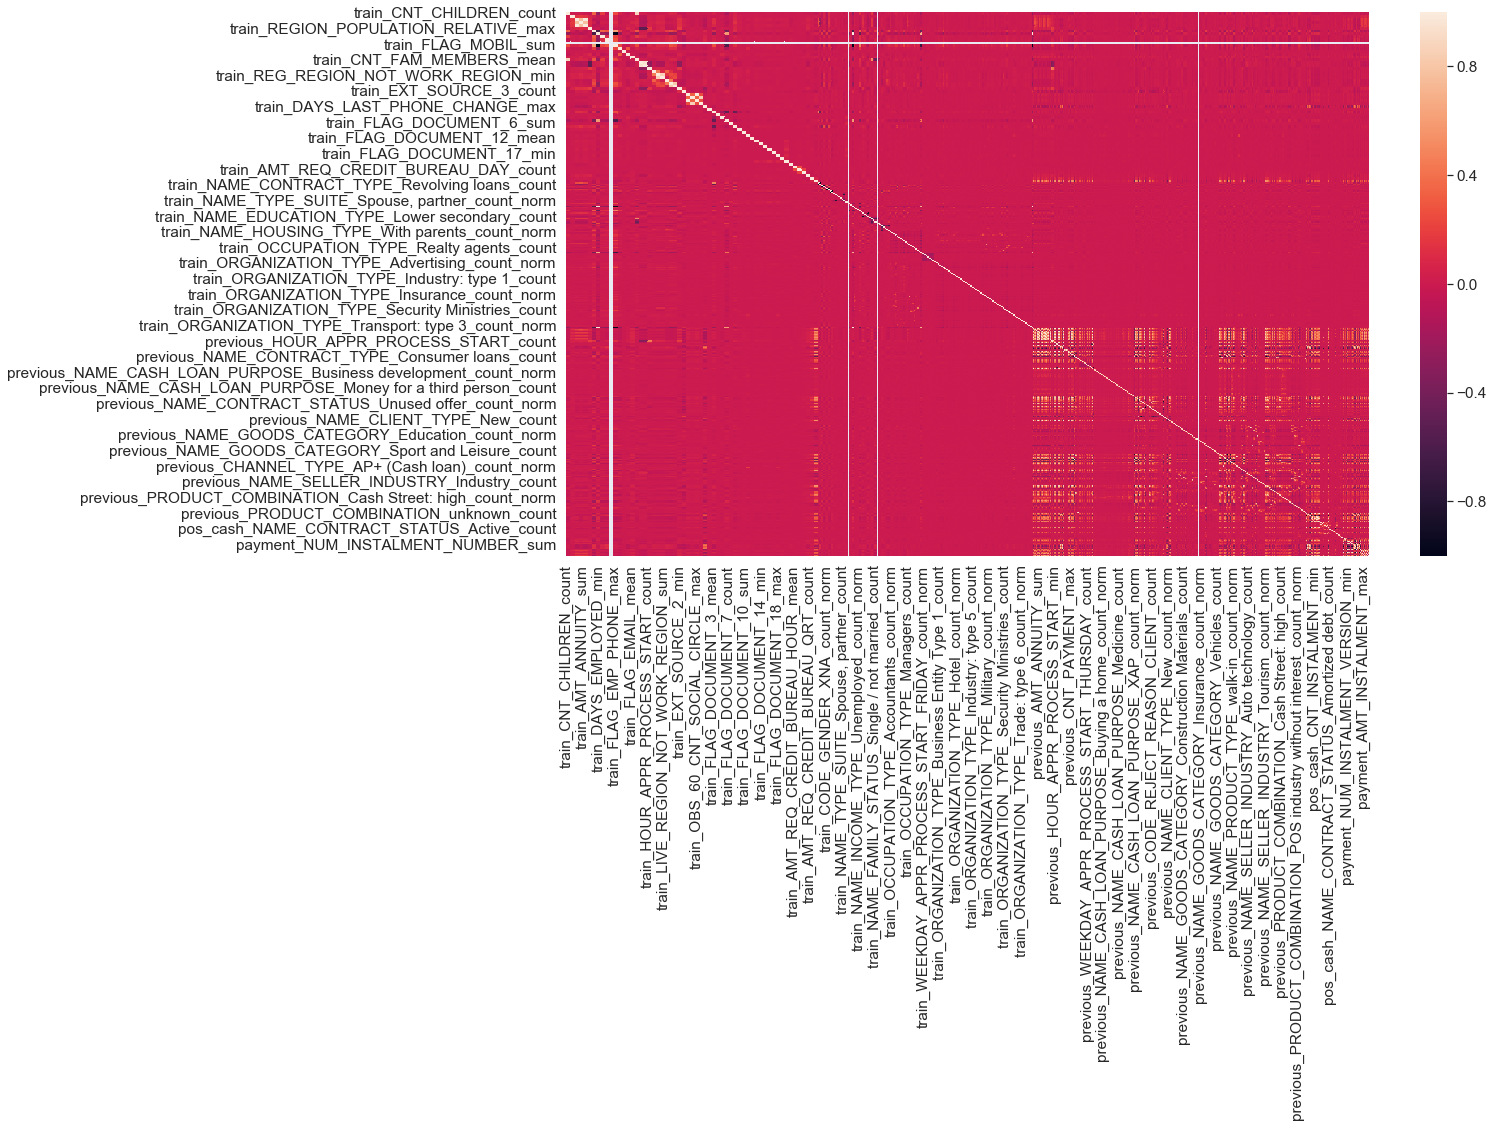

In [67]:
# check correlation between features

plt.figure(figsize = (18,10))
sns.heatmap(df_home_final_update.drop(columns = ['SK_ID_CURR','TARGET']).corr())

In [75]:
# features of dataframe 

df_home_final_update.columns[300:400]

Index(['train_NAME_CONTRACT_TYPE_Revolving loans_count_norm',
       'train_CODE_GENDER_F_count', 'train_CODE_GENDER_F_count_norm',
       'train_CODE_GENDER_M_count', 'train_CODE_GENDER_M_count_norm',
       'train_CODE_GENDER_XNA_count', 'train_CODE_GENDER_XNA_count_norm',
       'train_FLAG_OWN_CAR_N_count', 'train_FLAG_OWN_CAR_N_count_norm',
       'train_FLAG_OWN_CAR_Y_count', 'train_FLAG_OWN_CAR_Y_count_norm',
       'train_FLAG_OWN_REALTY_N_count', 'train_FLAG_OWN_REALTY_N_count_norm',
       'train_FLAG_OWN_REALTY_Y_count', 'train_FLAG_OWN_REALTY_Y_count_norm',
       'train_NAME_TYPE_SUITE_Children_count',
       'train_NAME_TYPE_SUITE_Children_count_norm',
       'train_NAME_TYPE_SUITE_Family_count',
       'train_NAME_TYPE_SUITE_Family_count_norm',
       'train_NAME_TYPE_SUITE_Group of people_count',
       'train_NAME_TYPE_SUITE_Group of people_count_norm',
       'train_NAME_TYPE_SUITE_Other_A_count',
       'train_NAME_TYPE_SUITE_Other_A_count_norm',
       'train_NAME_T

In [68]:
# from correlation heatmap plot of dataframe without tartget , There seems some features have correlation .
# Remove that features

features = ['train_FLAG_EMP_PHONE_max','train_NAME_TYPE_SUITE_Spouse, partner_count',
            'train_NAME_FAMILY_STATUS_Single / not married_count']

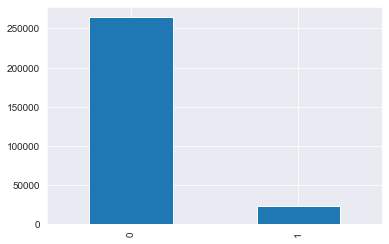

In [20]:
# check balance targete feature 
df_home_final_update['TARGET'].value_counts().plot(kind='bar')

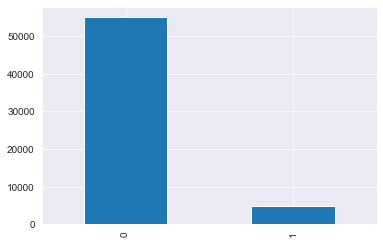

In [21]:
# taking sample from population 

df_home_sample = df_home_final_update.sample(n=60000,random_state=42)

# check balance targete feature 
df_home_sample['TARGET'].value_counts().plot(kind='bar')

In [ ]:
# correlation between feattures except target 
#plt.figure(figsize=(15,6))
#sns.heatmap(df_home_final_update.drop('TARGET',axis = 1).corr())

In [82]:
# create dataframe for PCA 
df_pca= df_home_final_update.drop(columns=['SK_ID_CURR','TARGET'])


# standerscaling for PCA 
ss =StandardScaler()
df_ss = pd.DataFrame(ss.fit_transform(df_pca),columns=df_pca.columns)
print(df_ss.shape)
df_ss.head()


(288028, 939)


train_CNT_CHILDREN_count  train_CNT_CHILDREN_mean  train_CNT_CHILDREN_max  \
0                       0.0                -0.582454               -0.582454   
1                       0.0                -0.582454               -0.582454   
2                       0.0                -0.582454               -0.582454   
3                       0.0                -0.582454               -0.582454   
4                       0.0                -0.582454               -0.582454   

   train_CNT_CHILDREN_min  train_CNT_CHILDREN_sum  \
0               -0.582454               -0.582454   
1               -0.582454               -0.582454   
2               -0.582454               -0.582454   
3               -0.582454               -0.582454   
4               -0.582454               -0.582454   

   train_AMT_INCOME_TOTAL_count  train_AMT_INCOME_TOTAL_mean  \
0                           0.0                     0.146966   
1                           0.0                     0.426972   
2                           0.0                    -0.413046   
3                           0.0                    -0.133040   
4                           0.0                    -0.189041   

   train_AMT_INCOME_TOTAL_max  train_AMT_INCOME_TOTAL_min  \
0                    0.146966                    0.146966   
1                    0.426972                    0.426972   
2                   -0.413046                   -0.413046   
3                   -0.133040                   -0.133040   
4                   -0.189041                   -0.189041   

   train_AMT_INCOME_TOTAL_sum  train_AMT_CREDIT_count  train_AMT_CREDIT_mean  \
0                    0.146966                     0.0              -0.471150   
1                    0.426972                     0.0               1.793970   
2                   -0.413046                     0.0              -1.164799   
3                   -0.133040                     0.0              -0.711005   
4                   -0.189041                     0.0              -0.199402   

   train_AMT_CREDIT_max  train_AMT_CREDIT_min  train_AMT_CREDIT_sum  \
0             -0.471150             -0.471150             -0.471150   
1              1.793970              1.793970              1.793970   
2             -1.164799             -1.164799             -1.164799   
3             -0.711005             -0.711005             -0.711005   
4             -0.199402             -0.199402             -0.199402   

   train_AMT_ANNUITY_count  train_AMT_ANNUITY_mean  train_AMT_ANNUITY_max  \
0                      0.0               -0.163302              -0.163302   
1                      0.0                0.616761               0.616761   
2                      0.0               -1.436491              -1.436491   
3                      0.0                0.190344               0.190344   
4                      0.0               -0.364383              -0.364383   

   train_AMT_ANNUITY_min  train_AMT_ANNUITY_sum  train_AMT_GOODS_PRICE_count  \
0              -0.163302              -0.163302                          0.0   
1               0.616761               0.616761                          0.0   
2              -1.436491              -1.436491                          0.0   
3               0.190344               0.190344                          0.0   
4              -0.364383              -0.364383                          0.0   

   train_AMT_GOODS_PRICE_mean  train_AMT_GOODS_PRICE_max  \
0                   -0.502135                  -0.502135   
1                    1.672898                   1.672898   
2                   -1.105613                  -1.105613   
3                   -0.653005                  -0.653005   
4                   -0.049527                  -0.049527   

   train_AMT_GOODS_PRICE_min  train_AMT_GOODS_PRICE_sum  \
0                  -0.502135                  -0.502135   
1                   1.672898                   1.672898   
2                  -1.105613                  -1.105613   
3 

 Number of Components more upto 90%  :  242


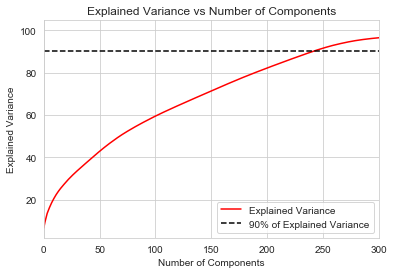

In [71]:
# finding no of components by PCA algorithm
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_ss)
cumsum = np.cumsum(pca.explained_variance_ratio_)*100
d = [n for n in range(len(cumsum))]
plt.figure(figsize=(6,4))
plt.plot(d, cumsum, color='red', label = 'Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.ylabel('Explained Variance')
plt.xlabel('Number of Components')
plt.axhline(y = 90, color='k', linestyle='--', label = '90% of Explained Variance')
plt.xlim(0,300)
plt.legend(loc='best')
print(" Number of Components more upto 90%  : " , (cumsum < 90).sum())

In [53]:
# diplay no of important features 

print(" Number of Components more upto 90%  : " , (cumsum < 90).sum())

 Number of Components more upto 90%  242


In [91]:
# taking dataframe from  PCA  unsupervised algorithm 
# to check correlation before fit model
pca = PCA(n_components=242)
pca.fit(df_ss)

PCA(copy=True, iterated_power='auto', n_components=242, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [92]:
# transform pca to dataframe 
columns = [ 'pca_%i' %i for i in range(242)]
df_pca = pd.DataFrame(pca.transform(df_ss),columns = columns ,index = df_ss.index)
print(df_pca.shape)
df_pca.head()

(288028, 242)


pca_0     pca_1     pca_2     pca_3     pca_4     pca_5     pca_6  \
0  -7.461032 -0.081522  2.784395 -1.991209  4.327611  2.522756 -1.862809   
1  -1.196916  0.478191  1.232599  9.087911 -1.751639  2.847279  1.332147   
2 -10.096881 -0.225224 -0.717218 -4.506554 -0.195552 -1.855679 -3.165260   
3   6.641468 -0.204059  5.692982 -2.650949 -0.468230  0.319521  0.567843   
4   3.070621  1.049053 -2.814829  1.283682  1.902421 -2.734049 -5.374795   

      pca_7     pca_8     pca_9    pca_10    pca_11    pca_12    pca_13  \
0  9.119166 -0.333399  1.858793 -3.388325  2.005923  3.234608  2.430468   
1 -0.829273 -3.513154 -1.794311 -3.347340 -1.221450 -2.347125  1.408076   
2 -1.531888 -2.193909 -2.774561  1.459516  1.746128  3.085324  3.930509   
3 -0.092669 -2.502788  0.297301 -2.510139 -2.241664  0.297226  1.894835   
4 -1.545807  2.825837 -0.958048  1.378175  0.650403  4.880824  1.436696   

     pca_14    pca_15    pca_16    pca_17    pca_18    pca_19    pca_20  \
0 -2.402309  3.869481 -0.827996 -4.819242 -9.045112 -0.065249  2.651916   
1  3.072622 -0.115924 -0.886567 -0.695371  0.498401  0.395110 -0.862990   
2  0.631819  2.558251  1.729147 -0.483892 -1.740959 -3.007198 -0.728862   
3 -0.891673  0.885614  1.139997  1.579593  0.041941  0.424067 -0.252448   
4 -3.819699  1.773945 -2.153561 -1.824608  0.768993  0.611627 -2.158461   

     pca_21    pca_22    pca_23    pca_24    pca_25    pca_26    pca_27  \
0 -5.277663  0.365470  0.375934  2.551408  0.122887  0.045260  8.179497   
1  1.397463  1.966933 -0.487109 -2.259379  1.987760 -2.036878 -0.614574   
2  3.162305  0.182305 -1.752215  0.869585  0.741687  0.760107 -0.367044   
3  0.351261  3.155940 -0.632502  1.022987 -1.652055  0.582087  0.065771   
4  3.792501 -1.875868 -0.762461 -2.484328  1.653149  0.562004 -1.765799   

     pca_28    pca_29    pca_30    pca_31    pca_32    pca_33    pca_34  \
0 -1.692271 -5.984858  0.736205  2.073791 -0.612428  1.721393 -0.576151   
1  0.937665 -0.106752  2.496553 -1.310060  0.329209  0.243249  0.214681   
2  1.480002 -1.793731  3.331296 -1.049318  0.892552 -1.305130  1.712663   
3  0.892891  0.639972 -0.538870 -2.220204  0.228673 -1.024949 -0.484939   
4 -1.040293  0.308141  1.090726  0.334370 -2.202665  1.747218  0.362068   

     pca_35    pca_36    pca_37    pca_38    pca_39    pca_40    pca_41  \
0  0.672472  1.080891  0.665022 -0.293593  0.652876 -0.063457 -0.123913   
1 -0.136718  0.737109 -1.171254  1.051840  0.102374 -0.233601 -0.115685   
2 -0.417437 -0.304578  0.782196 -0.059437 -0.368734 -0.326371  0.282184   
3 -0.997757  0.326994 -0.105978 -0.617806 -0.293944  0.234665  0.229646   
4  0.277813  0.430082  0.194214  0.206309  0.231372  0.141208  0.206642   

     pca_42    pca_43    pca_44    pca_45    pca_46    pca_47    pca_48  \
0 -0.170678 -1.532669  0.871025  1.575558  1.621704 -0.765306  1.420663   
1 -0.465098  0.066010  0.696582  0.455711  1.225759 -3.362057 -2.506967   
2 -0.454106 -0.531806 -0.616464 -1.217166 -1.941871  0.538208  0.123086   
3 -0.386902  0.668498 -0.499653 -0.272224 -1.759341  0.821219  0.094286   
4  0.065586 -0.868041 -0.502007 -0.553116  1.222319 -1.761306  0.786485   

     pca_49    pca_50    pca_51    pca_52    pca_53    pca_54    pca_55  \
0  0.005731 -0.806393  1.952882  0.675642 -1.985496 -0.778494 -0.743649   
1 -3.625881 -1.473029  0.535911  4.398513 -0.291646  1.104310 -0.416517   
2  2.390724 -1.125307 -1.450615 -0.390318  1.605521 -0.350099 -0.261946   
3 -0.192190  0.599646  0.143033 -0.982127  0.514286  0.680531 -1.221986   
4 -1.558762  0.697955  0.117487  0.193724 -0.144930 -0.486761  0.783728   

     pca_56    pca_57    pca_58    pca_59    pca_60    pca_61    pca_62  \
0  1.067376 -1.197789 -4.287798  0.843665 -1.072037 -1.066045 -0.391614   
1  0.873992 -1.957378  1.174277  0.580474 -0.432905  0.674847 -1.832126   
2  0.833351 -2.009834  1.850500  0.932085  2.258185 -1.772338 -3.106193   
3  1.149000  2.731158 -0.064329 -1.400053 -0.483785  2.521524  0.150929   
4 -1.196973  2.880

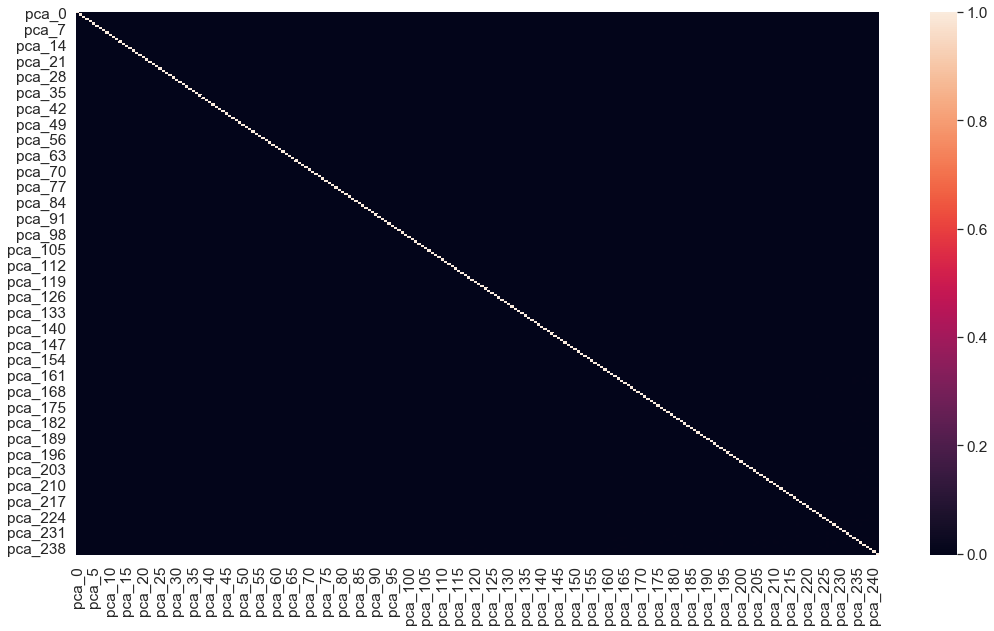

In [93]:
# check correlation  PCA DataFrame 

plt.figure(figsize = (18,10))
sns.heatmap(df_pca.corr())


It looks no multicollinearity among features when it is fited by PCA decomposition feature

In [72]:
print(df_home_final_update.shape)
df_home_final_update.head()

(288028, 941)


SK_ID_CURR  train_CNT_CHILDREN_count  train_CNT_CHILDREN_mean  \
0      100002                         1                        0   
1      100003                         1                        0   
2      100004                         1                        0   
3      100006                         1                        0   
4      100007                         1                        0   

   train_CNT_CHILDREN_max  train_CNT_CHILDREN_min  train_CNT_CHILDREN_sum  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   train_AMT_INCOME_TOTAL_count  train_AMT_INCOME_TOTAL_mean  \
0                             1                     202500.0   
1                             1                     270000.0   
2                             1                      67500.0   
3                             1                     135000.0   
4                             1                     121500.0   

   train_AMT_INCOME_TOTAL_max  train_AMT_INCOME_TOTAL_min  \
0                    202500.0                    202500.0   
1                    270000.0                    270000.0   
2                     67500.0                     67500.0   
3                    135000.0                    135000.0   
4                    121500.0                    121500.0   

   train_AMT_INCOME_TOTAL_sum  train_AMT_CREDIT_count  train_AMT_CREDIT_mean  \
0                    202500.0                       1               406597.5   
1                    270000.0                       1              1293502.5   
2                     67500.0                       1               135000.0   
3                    135000.0                       1               312682.5   
4                    121500.0                       1               513000.0   

   train_AMT_CREDIT_max  train_AMT_CREDIT_min  train_AMT_CREDIT_sum  \
0              406597.5              406597.5              406597.5   
1             1293502.5             1293502.5             1293502.5   
2              135000.0              135000.0              135000.0   
3              312682.5              312682.5              312682.5   
4              513000.0              513000.0              513000.0   

   train_AMT_ANNUITY_count  train_AMT_ANNUITY_mean  train_AMT_ANNUITY_max  \
0                        1                 24700.5                24700.5   
1                        1                 35698.5                35698.5   
2                        1                  6750.0                 6750.0   
3                        1                 29686.5                29686.5   
4                        1                 21865.5                21865.5   

   train_AMT_ANNUITY_min  train_AMT_ANNUITY_sum  train_AMT_GOODS_PRICE_count  \
0                24700.5                24700.5                            1   
1                35698.5                35698.5                            1   
2                 6750.0                 6750.0                            1   
3                29686.5                29686.5                            1   
4                21865.5                21865.5                            1   

   train_AMT_GOODS_PRICE_mean  train_AMT_GOODS_PRICE_max  \
0                    351000.0                   351000.0   
1                   1129500.0                  1129500.0   
2                    135000.0                   135000.0   
3                    297000.0                   297000.0   
4                    513000.0                   513000.0   

   train_AMT_GOODS_PRICE_min  train_AMT_GOODS_PRICE_sum  \
0                   351000.0                   351000.0   
1                  1129500.0                  11

(45000, 939) (45000,)
(15000, 939) (15000,)
AxesSubplot(0.125,0.125;0.775x0.755)


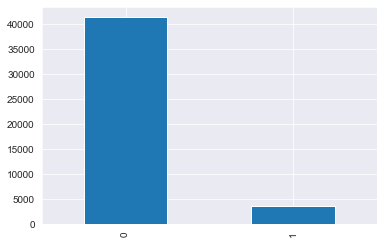

In [22]:
# Data preparing for model 
#df_train_bureau =df_train_bureau.iloc[:,1:]
#df_train_bureau.head()

# taking sample from population 

df_home_sample = df_home_final_update.sample(n=60000,random_state=42)


#df_home_sample = df_home_final_update.copy()

# making target and features 
X = df_home_sample.drop(columns=['SK_ID_CURR','TARGET'])
y = df_home_sample['TARGET']

# split 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state =123)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
print(y_train.value_counts().plot(kind='bar'))

Using TensorFlow backend.


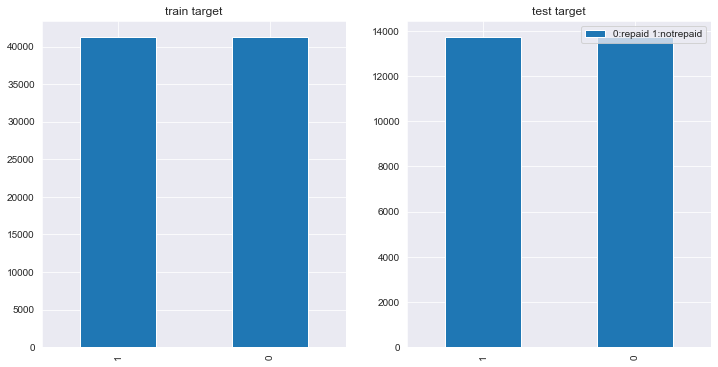

In [23]:
# making balance target by SMOTE
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
X_train,y_train = sm.fit_sample(X_train,y_train)
X_test,y_test = sm.fit_sample(X_test,y_test)

# check balance in target 

fig ,ax = plt.subplots(1,2,figsize=(12,6))
y_train.value_counts().plot(kind='bar',ax=ax[0],label='0:repaid 1:notrepaid')
y_test.value_counts().plot(kind='bar',ax=ax[1],label='0:repaid 1:notrepaid')
ax[0].set_title("train target")
ax[1].set_title("test target")
plt.legend()

#### Random Forest 

In [27]:
# random forest 

# making pipe for RandomForestClassifier

pipe_rf = Pipeline([('ss',StandardScaler()),
                    ('pca',PCA(n_components=242)),
                 ('rf',RandomForestClassifier(random_state =123))])
                 
pipe_rf.fit(X_train,y_train)   

# accuracy
print("Train score : ", pipe_rf.score(X_train,y_train))
print("test score :",pipe_rf.score(X_test,y_test))

Train score :  0.9988143344544729
test score : 0.9098545454545455


In [54]:
# confusion metrixs for RandomForest 

pred = pipe_rf.predict(X_test)
print("\n")
print("Confusion Matrix ")
print("------------------ \n ")
print(confusion_matrix(y_test,pred))
print("\n")
print("\n Classification Report  ")
print("---------------------------- \n")
print(classification_report(y_test,pred))
print("\n")
print(" Roc_auc_score :")
print("------------------ \n")
print(roc_auc_score(y_test,pred))


Confusion Matrix 
------------------ 
 
[[20124  1074]
 [ 3012 18186]]

 Classification Report  
---------------------------- 

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     21198
           1       0.94      0.86      0.90     21198

    accuracy                           0.90     42396
   macro avg       0.91      0.90      0.90     42396
weighted avg       0.91      0.90      0.90     42396

 Roc_auc_score :
------------------ 

0.9036229833003114


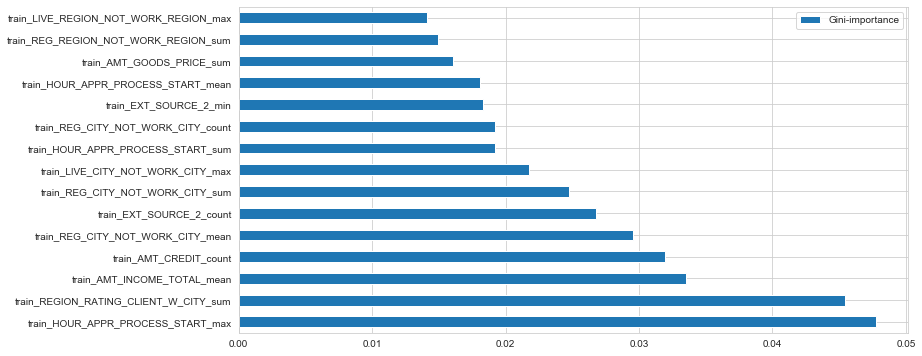

In [80]:
# importance feature 
manage_model.plot_feature(pipe_rf[2],X_train)

#### LightGradientBoosting Machine Learning Algorithm

In [24]:
#lgbm = lgb.LGBMClassifier()

pipe_lgbm = Pipeline([('ss',StandardScaler()),
                    ('pca',PCA(n_components=242)),
                 ('lgbm',lgb.LGBMClassifier())])
                 
pipe_lgbm.fit(X_train,y_train)   

# accuracy
print("Train score : ", pipe_lgbm.score(X_train,y_train))
print("test score :",pipe_lgbm.score(X_test,y_test))

Train score :  0.954388172381252
test score : 0.9418181818181818


In [30]:
# confusion metrics for RandomForest 

pred = pipe_lgbm.predict(X_test)
print("Confusion Matrix ")
print("------------------ \n ")
print(confusion_matrix(y_test,pred))
print("\n Classification Report  ")
print("---------------------------- \n")
print(classification_report(y_test,pred))
print(" Roc_auc_score :")
print("------------------ \n")
print(roc_auc_score(y_test,pred))

Confusion Matrix 
------------------ 
 
[[13635   115]
 [ 1495 12255]]

 Classification Report  
---------------------------- 

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     13750
           1       0.99      0.89      0.94     13750

    accuracy                           0.94     27500
   macro avg       0.95      0.94      0.94     27500
weighted avg       0.95      0.94      0.94     27500

 Roc_auc_score :
------------------ 

0.9414545454545454


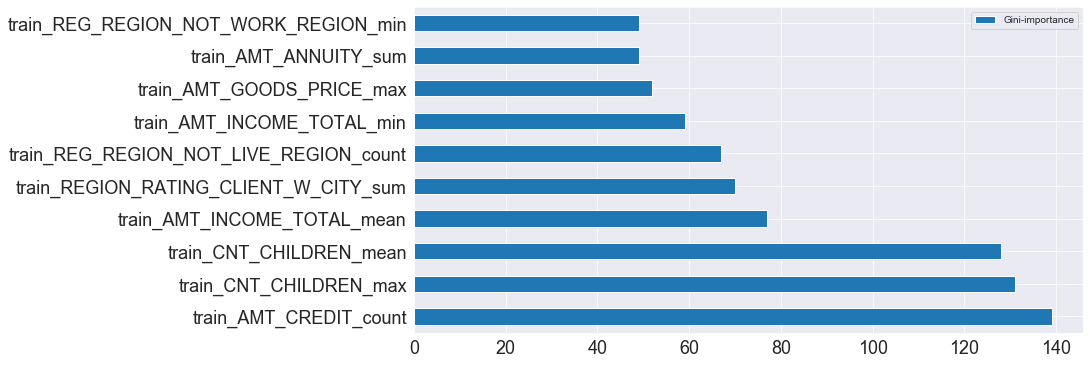

In [27]:
# importance feature 
manage_model.plot_feature(pipe_lgbm[2],X_train)

In [68]:
df_home_final_update['train_CNT_CHILDREN_mean'].value_counts()

0     200560
1      57887
2      25480
3       3565
4        415
5         81
6         19
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: train_CNT_CHILDREN_mean, dtype: int64

The correlation between train_AMT_CREDIT_count and the TARGET is nan
Median value for loan that was not repaid = 1.0000
Median value for loan that was repaid = 1.0000


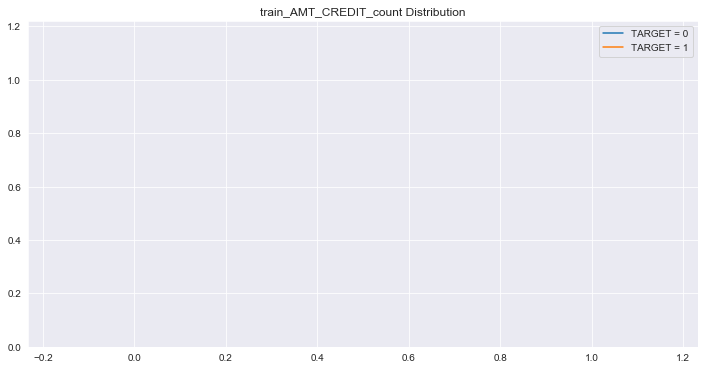

In [64]:
# check kde plot of most important featuter

manage_corr.Kde_target('train_AMT_CREDIT_count',df_home_final_update)

The correlation between train_CNT_CHILDREN_mean and the TARGET is 0.0193
Median value for loan that was not repaid = 0.0000
Median value for loan that was repaid = 0.0000


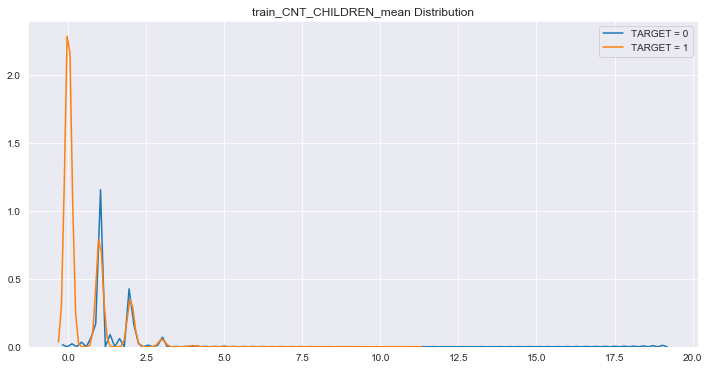

In [69]:
# check kde plot of most important featuter

manage_corr.Kde_target('train_CNT_CHILDREN_mean',df_home_final_update)

#### Naive Bayes GaussionNB

In [31]:
# Naive Bayes GaussianNB

pipe_naive = Pipeline([('ss',StandardScaler()),
                       ('pca',PCA(n_components=242)),
                       ('ga',GaussianNB())])
                 
pipe_naive.fit(X_train,y_train) 

print("Train score : ", pipe_naive.score(X_train,y_train))
print("test score :",pipe_naive.score(X_test,y_test))

# confusion metrixs for Naive Bayes GaussianNB 

pred = pipe_naive.predict(X_test)
print("Confusion Matrix ")
print("------------------ \n ")
print(confusion_matrix(y_test,pred))
print("\n Classification Report  ")
print("---------------------------- \n")
print(classification_report(y_test,pred))
print(" Roc_auc_score :")
print("------------------ \n")
print(roc_auc_score(y_test,pred))

Train score :  0.6987199651559514
test score : 0.6962545454545455
Confusion Matrix 
------------------ 
 
[[ 6680  7070]
 [ 1283 12467]]

 Classification Report  
---------------------------- 

              precision    recall  f1-score   support

           0       0.84      0.49      0.62     13750
           1       0.64      0.91      0.75     13750

    accuracy                           0.70     27500
   macro avg       0.74      0.70      0.68     27500
weighted avg       0.74      0.70      0.68     27500

 Roc_auc_score :
------------------ 

0.6962545454545455


#### Ada Boosting Algorithm

In [32]:
# Adaboost

pipe_ada = Pipeline([('ss',StandardScaler()),
                     ('pca',PCA(n_components=242)),
                     ('ada',AdaBoostClassifier(random_state=123))])
                 
pipe_ada.fit(X_train,y_train) 

print("Train score : ", pipe_ada.score(X_train,y_train))
print("test score :",pipe_ada.score(X_test,y_test))

# confusion metrixs for Ada Boosting Algorithm 

pred = pipe_naive.predict(X_test)
print("Confusion Matrix ")
print("------------------ \n ")
print(confusion_matrix(y_test,pred))
print("\n Classification Report  ")
print("---------------------------- \n")
print(classification_report(y_test,pred))
print(" Roc_auc_score :")
print("------------------ \n")
print(roc_auc_score(y_test,pred))

Train score :  0.8981174534807753
test score : 0.8962545454545454
Confusion Matrix 
------------------ 
 
[[ 6680  7070]
 [ 1283 12467]]

 Classification Report  
---------------------------- 

              precision    recall  f1-score   support

           0       0.84      0.49      0.62     13750
           1       0.64      0.91      0.75     13750

    accuracy                           0.70     27500
   macro avg       0.74      0.70      0.68     27500
weighted avg       0.74      0.70      0.68     27500

 Roc_auc_score :
------------------ 

0.6962545454545455


In [36]:
# XGBOOST 

pipe_xgb = Pipeline([('ss',StandardScaler()),
                     ('pca',PCA(n_components=242)),
                     ('xgb',xgb.XGBClassifier(random_state=123))])
                 
pipe_xgb.fit(X_train,y_train) 

print("Train score : ", pipe_ada.score(X_train,y_train))
print("test score :",pipe_ada.score(X_test,y_test))

# confusion metrixs for Ada Boosting Algorithm 

pred = pipe_xgb.predict(X_test)
print("Confusion Matrix ")
print("------------------ \n ")
print(confusion_matrix(y_test,pred))
print("\n Classification Report  ")
print("---------------------------- \n")
print(classification_report(y_test,pred))
print(" Roc_auc_score :")
print("------------------ \n")
print(roc_auc_score(y_test,pred))

Train score :  0.8981174534807753
test score : 0.8962545454545454
Confusion Matrix 
------------------ 
 
[[13427   323]
 [ 1533 12217]]

 Classification Report  
---------------------------- 

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     13750
           1       0.97      0.89      0.93     13750

    accuracy                           0.93     27500
   macro avg       0.94      0.93      0.93     27500
weighted avg       0.94      0.93      0.93     27500

 Roc_auc_score :
------------------ 

0.932509090909091


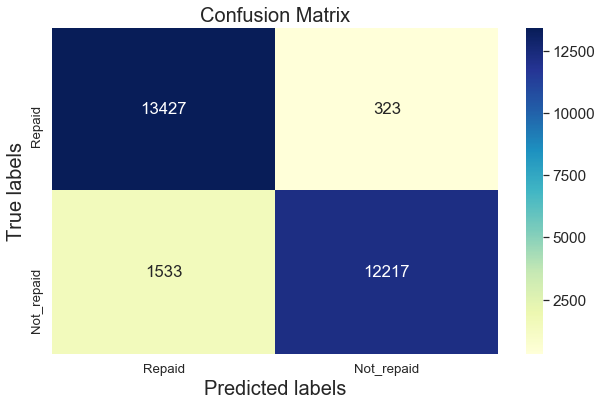

<Figure size 14400x10800 with 0 Axes>

In [69]:
# Confusion matrix of XGBoost

plt.figure(figsize = (10,6))  # figure size
ax = plt.subplot()
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='g',ax =ax , xticklabels= ['Repaid', 'Not_repaid'] ,
            yticklabels=['Repaid','Not_repaid'],cmap ='YlGnBu' )

# subplot
ax.set_xlabel("Predicted labels" , fontsize = 20 );ax.set_ylabel("True labels" , fontsize = 20 )
ax.set_title("Confusion Matrix", fontsize = 20)
#ax.xaxis.set_ticklabels(['Repaid', 'Not_repaid'], fontsize = 14); 
#ax.yaxis.set_ticklabels(['Repaid','Not_repaid'], fontsize = 14);

plt.show()
plt.savefig("Confusion_matrix_xgb.png")



In [43]:
# X_train data 
X_train.head()

train_CNT_CHILDREN_count  train_CNT_CHILDREN_mean  train_CNT_CHILDREN_max  \
0                         1                        0                       0   
1                         1                        0                       0   
2                         1                        0                       0   
3                         1                        0                       0   
4                         1                        0                       0   

   train_CNT_CHILDREN_min  train_CNT_CHILDREN_sum  \
0                       0                       0   
1                       0                       0   
2                       0                       0   
3                       0                       0   
4                       0                       0   

   train_AMT_INCOME_TOTAL_count  train_AMT_INCOME_TOTAL_mean  \
0                             1                      90000.0   
1                             1                     112500.0   
2                             1                     171000.0   
3                             1                      90000.0   
4                             1                     135000.0   

   train_AMT_INCOME_TOTAL_max  train_AMT_INCOME_TOTAL_min  \
0                     90000.0                     90000.0   
1                    112500.0                    112500.0   
2                    171000.0                    171000.0   
3                     90000.0                     90000.0   
4                    135000.0                    135000.0   

   train_AMT_INCOME_TOTAL_sum  ...  payment_AMT_INSTALMENT_count  \
0                     90000.0  ...                          86.0   
1                    112500.0  ...                          35.0   
2                    171000.0  ...                          20.0   
3                     90000.0  ...                          32.0   
4                    135000.0  ...                          61.0   

   payment_AMT_INSTALMENT_mean  payment_AMT_INSTALMENT_max  \
0                  4814.177442                  125948.880   
1                 11978.377714                  234085.365   
2                 15401.574000                  118933.605   
3                 34787.559375                  261868.275   
4                 15378.539016                   19151.100   

   payment_AMT_INSTALMENT_min  payment_AMT_INSTALMENT_sum  \
0                     166.500                   414019.26   
1                     810.315                   419243.22   
2                    3554.100                   308031.48   
3                    5546.610                  1113201.90   
4                    8771.130                   938090.88   

   payment_AMT_PAYMENT_count  payment_AMT_PAYMENT_mean  \
0                       86.0               4656.213314   
1                       35.0              11972.595857   
2                       20.0              15401.574000   
3                       32.0              34787.559375   
4                       61.0              14628.288689   

   payment_AMT_PAYMENT_max  payment_AMT_PAYMENT_min  payment_AMT_PAYMENT_sum  
0               125948.880                   20.925               400434.345  
1               234085.365                  810.315               419040.855  
2               118933.605                 3554.100               308031.480  
3               261868.275                 5546.610              1113201.900  
4                19151.100                  385.875               892325.610  

[5 rows x 939 columns]

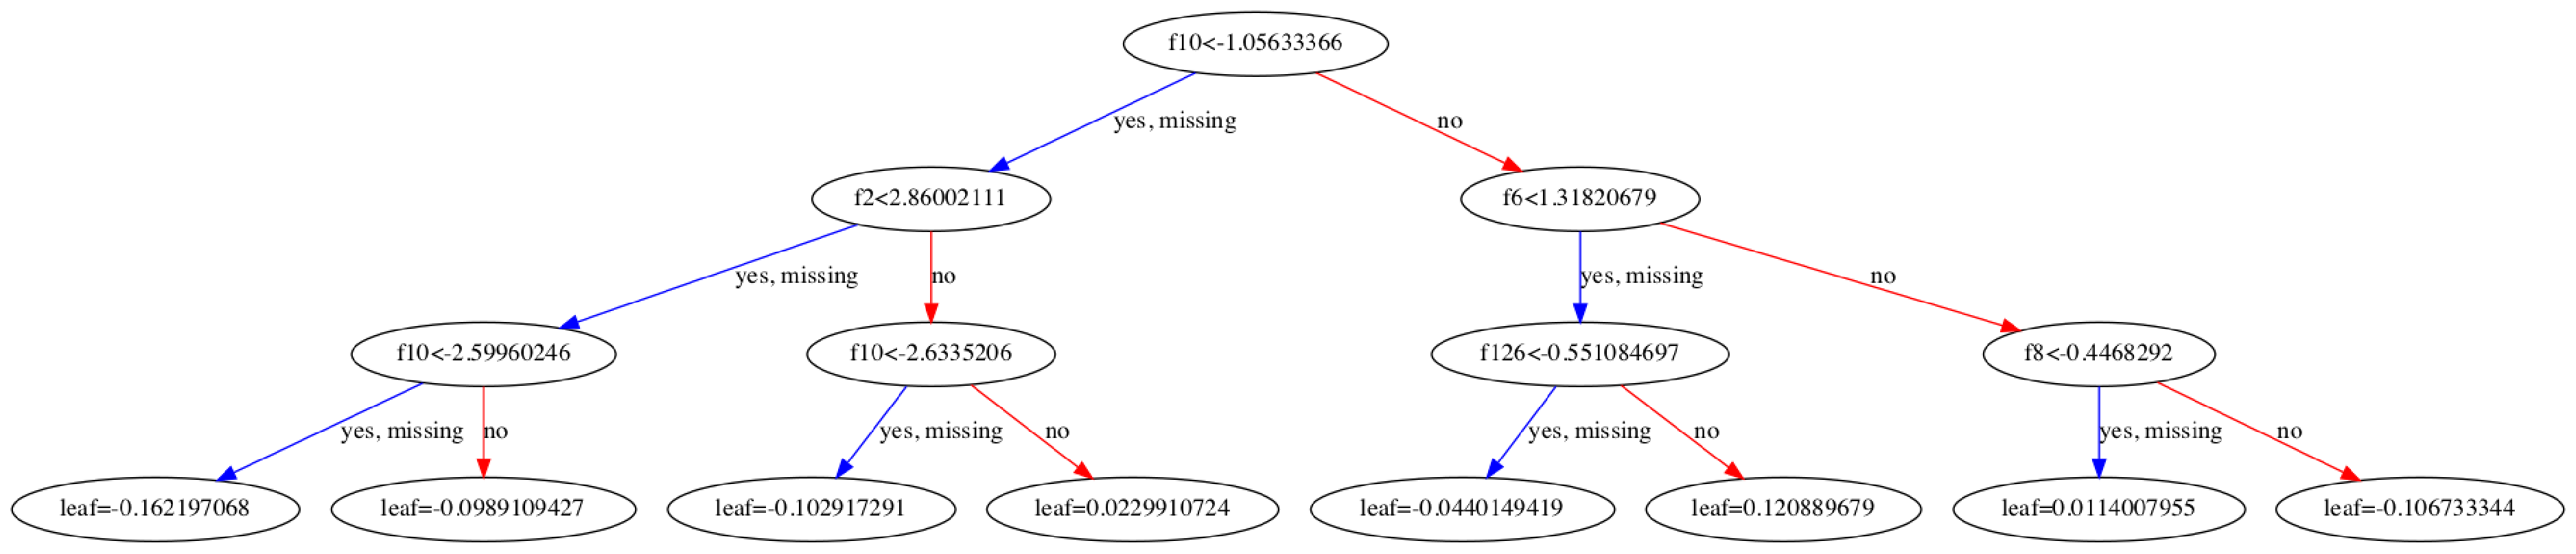

<Figure size 14400x10800 with 0 Axes>

In [42]:
# plot tree  of XGBoost

xgb.plot_tree(pipe_xgb[2])
plt.rcParams['figure.figsize']=[200,150]
plt.show()
plt.savefig("xgb_tree.png")

In [29]:
# making pipe line for all algorithm

# GaussianNB
pipe_naive = Pipeline([('ss',StandardScaler()),
                       ('pca',PCA(n_components=242)),
                       ('ga',GaussianNB())])

#AdaBoostClassifier
#pipe_ada = Pipeline([('ss',StandardScaler()),
#                 ('ada',AdaBoostClassifier(random_state=123))])

#RandomForest 
pipe_rf = Pipeline([('ss',StandardScaler()),
                    ('pca',PCA(n_components=242)),
                    ('rf',RandomForestClassifier(random_state =123))])

# Lightgbm

pipe_lgbm = Pipeline([('ss',StandardScaler()),
                      ('pca',PCA(n_components=242)),
                      ('lgbm',lgb.LGBMClassifier())])


# logistic Regression model 
pipe_logistic  = Pipeline([('ss',StandardScaler()),
                           ('pca',PCA(n_components=242)),
                           ('lg',LogisticRegressionCV())])


pipelists = [pipe_logistic,pipe_naive,pipe_rf,pipe_lgbm]
pipeline_names = ['Logistic Regression','Naive Bayes','RandomForest','LightGredientBoosting Algorithm']



# for loop to fit each algorithm
for pipe in pipelists:
    print(pipe)
    pipe.fit(X_train,y_train) 
    
#Compare Accuracies
for index,val in enumerate(pipelists):
    print("%s pipeline test accuracy : %.3f" %(pipeline_names[index],val.score(X_test,y_test)))

Pipeline(memory=None,
         steps=[('ss',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=242,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('lg',
                 LogisticRegressionCV(Cs=10, class_weight=None, cv=None,
                                      dual=False, fit_intercept=True,
                                      intercept_scaling=1.0, l1_ratios=None,
                                      max_iter=100, multi_class='auto',
                                      n_jobs=None, penalty='l2',
                                      random_state=None, refit=True,
                                      scoring=None, solver='lbfgs', tol=0.0001,
                                      verbose=0))],
         verbose=False)
Pipeline(memory=None,
         steps=[('ss',
                 StandardSc

#### Tuning and optimization of RandomForest and  LightGBM algorithm 


In [75]:
# RandomForest 
pipe_rf = Pipeline([('sc',StandardScaler()),
                 ('pca',PCA(n_components=242)),
                 ('rf',RandomForestClassifier(random_state=123))])


# create the grid parameter
n_estimators = [100, 300,400]
max_depth = [5, 8]
min_samples_split = [2, 5,8]
min_samples_leaf = [ 5, 10,15]

grid = [{'rf__n_estimators':n_estimators,
          'rf__max_depth':max_depth,
          'rf__min_samples_split':min_samples_split,
          'rf__min_samples_leaf':min_samples_leaf}]


gridsearch  = GridSearchCV(estimator=pipe_rf,param_grid=grid,scoring='accuracy',cv=3)
gridsearch.fit(X_train,y_train)


print("Best Parameter " )
print("-----------------\n")
print(gridsearch.best_params_)

print("\n")
print("Best Score ")
print("-----------\n")
print(gridsearch.best_score_)

make_scorer(accuracy_score)

In [87]:
# display best paramete and score

print("Best Parameter " )
print("-----------------\n")
print(gridsearch.best_params_)

print("\n")
print("Best Score ")
print("-----------\n")
print(gridsearch.best_score_)




Best Parameter 
-----------------

{'rf__max_depth': 8, 'rf__min_samples_leaf': 5, 'rf__min_samples_split': 8, 'rf__n_estimators': 400}


Best Score 
-----------

0.910725233541827


In [94]:
# predict with best gridsearch parameter

print("Best from Grid Search Train Score ")
print("-----------\n")
print(gridsearch.best_score_)


print("\n")
best = gridsearch.best_estimator_
y_pred_grid = best.predict(X_test)
print("Best Test score with gridsearch's best parameter: ")
print("--------------------------------\n")
print(accuracy_score(y_pred_grid,y_test))

Best from Grid Search Train Score 
-----------

0.910725233541827


Best Test score with gridsearch's best parameter: 
--------------------------------

0.9026909090909091


In [28]:
# light GBM optimization


pipe_lgbm = Pipeline([('ss',StandardScaler()),
                    ('pca',PCA(n_components=242)),
                 ('lgbm',lgb.LGBMClassifier())])


# create the grid parameter
#n_estimators = [100, 300,400]
#max_depth = [5, 8]
#min_samples_split = [2, 5,8]
#min_samples_leaf = [ 5, 10,15]

grid_para = {'lgbm__boosting_type':['gbdt','goss','dart'],
              'lgbm__num_leave':list(range(20,150)),
              'lgbm__learning_rate':list(np.logspace(np.log10(0.005),np.log10(0.5),base =10,num=1000)),
               'lgbm__subsample_for_bin': list(range(20000, 300000, 20000)),
               'lgbm__min_child_samples': list(range(20, 500, 5)),
               'lgbm__reg_alpha': list(np.linspace(0, 1)),
                'lgbm__reg_lambda': list(np.linspace(0, 1)),
                'lgbm__colsample_bytree': list(np.linspace(0.6, 1, 10)),
                'lgbm__subsample': list(np.linspace(0.5, 1, 100)),
                'lgbm__is_unbalance': [True, False]}


gridsearch  = GridSearchCV(estimator=pipe_lgbm,param_grid=grid_para,scoring='accuracy',cv=3)
gridsearch.fit(X_train,y_train)


print("Best Parameter " )
print("-----------------\n")
print(gridsearch.best_params_)

print("\n")
print("Best Score ")
print("-----------\n")
print(gridsearch.best_score_)

MemoryError: 

In [107]:
# light GBM optimization



grid_para = {'lgbm__boosting_type':['gbdt','goss','dart'],
              'lgbm__num_leave':list(range(20,150)),
              'lgbm__learning_rate':list(np.logspace(np.log10(0.005),np.log10(0.5),base =10,num=1000)),
               'lgbm__subsample_for_bin': list(range(20000, 300000, 20000)),
               'lgbm__min_child_samples': list(range(20, 500, 5)),
               'lgbm__reg_alpha': list(np.linspace(0, 1)),
                'lgbm__reg_lambda': list(np.linspace(0, 1)),
                'lgbm__colsample_bytree': list(np.linspace(0.6, 1, 10)),
                'lgbm__subsample': list(np.linspace(0.5, 1, 100)),
                'lgbm__is_unbalance': [True, False]}



N_FOLDS = 5
MAX_EVALS = 5

train_set = lgb.Dataset(data = X_train,label=y_train)
test_set =lgb.Dataset(data= X_test,label = y_test)

In [110]:
# Get default hyperparameters
model = lgb.LGBMClassifier()
default_params = model.get_params()

# Remove the number of estimators because we set this to 10000 in the cv call
del default_params['n_estimators']

# Cross validation with early stopping
cv_results = lgb.cv(default_params, train_set, num_boost_round = 10000, early_stopping_rounds = 100, 
                    metrics = 'auc', nfold = N_FOLDS, seed = 42)

In [111]:
cv_results

{'auc-mean': [0.9265827080896136,
  0.940247290442195,
  0.9477258469303902,
  0.9552240025057067,
  0.9598302913621918,
  0.9638372424088251,
  0.9664559532810315,
  0.9682834407713337,
  0.969578718024532,
  0.9708549836900197,
  0.9718700539429082,
  0.9725012536906215,
  0.9729023476711689,
  0.9734954444992372,
  0.9741057171728189,
  0.9745079790715501,
  0.9749586686581143,
  0.9751120041470154,
  0.9754953981214518,
  0.9755857952597241,
  0.9758340653757582,
  0.9759946399067226,
  0.9762594650163509,
  0.9763937368767939,
  0.9765743730578045,
  0.9766627338358311,
  0.9767813439463172,
  0.9770252564139319,
  0.9770901378770731,
  0.9772205261435474,
  0.9772445213776333,
  0.9773107697519421,
  0.9774536844004056,
  0.9774794922001776,
  0.9775232540964603,
  0.9776273386090368,
  0.9776552854576369,
  0.977773239583863,
  0.9779459933521439,
  0.9780086435247162,
  0.9780773391683685,
  0.97814806931505,
  0.978156032516687,
  0.9781745193247284,
  0.9782691297902397,
  0.

In [108]:
def objective(hyperparameters, iteration):
    """Objective function for grid and random search. Returns
       the cross validation score from a set of hyperparameters."""
    
    # Number of estimators will be found using early stopping
    if 'n_estimators' in hyperparameters.keys():
        del hyperparameters['n_estimators']
    
     # Perform n_folds cross validation
    cv_results = lgb.cv(hyperparameters, train_set, num_boost_round = 10000, nfold = N_FOLDS, 
                        early_stopping_rounds = 100, metrics = 'auc', seed = 42)
    
    # results to retun
    score = cv_results['auc-mean'][-1]
    estimators = len(cv_results['auc-mean'])
    hyperparameters['n_estimators'] = estimators 
    
    return [score, hyperparameters, iteration]

In [112]:
def random_search(param_grid, max_evals = MAX_EVALS):
    """Random search for hyperparameter optimization"""
    
    # Dataframe for results
    results = pd.DataFrame(columns = ['score', 'params', 'iteration'],
                                  index = list(range(MAX_EVALS)))
    
    # Keep searching until reach max evaluations
    for i in range(MAX_EVALS):
        
        # Choose random hyperparameters
        hyperparameters = {k: random.sample(v, 1)[0] for k, v in param_grid.items()}
        hyperparameters['subsample'] = 1.0 if hyperparameters['boosting_type'] == 'goss' else hyperparameters['subsample']

        # Evaluate randomly selected hyperparameters
        eval_results = objective(hyperparameters, i)
        
        results.loc[i, :] = eval_results
    
    # Sort with best score on top
    results.sort_values('score', ascending = False, inplace = True)
    results.reset_index(inplace = True)
    return results 

In [ ]:
random_results = rand

In [ ]:
#lgbm = lgb.LGBMClassifier()

"""

default parameter

    boosting_type='gbdt',
    num_leaves=31,
    max_depth=-1,
    learning_rate=0.1,
    n_estimators=100,
    subsample_for_bin=200000,
    objective=None,
    class_weight=None,
    min_split_gain=0.0,
    min_child_weight=0.001,
    min_child_samples=20,
    subsample=1.0,
    subsample_freq=0,
    colsample_bytree=1.0,
    reg_alpha=0.0,
    reg_lambda=0.0,
    random_state=None,
    n_jobs=-1,
    silent=True,
"""


pipe_lgbm = Pipeline([('ss',StandardScaler()),
                    ('pca',PCA(n_components=242)),
                 ('lgbm',lgb.LGBMClassifier())])

grid_para = {'lgbm__boosting_type':['gbdt','goss','dart'],
              'lgbm__num_leave':list(range(20,150)),
              'lgbm__learning_rate':list(np.logspace(np.log10(0.005),np.log10(0.5),base =10,num=1000)),
               'lgbm__subsample_for_bin': list(range(20000, 300000, 20000)),
               'lgbm__min_child_samples': list(range(20, 500, 5)),
               'lgbm__reg_alpha': list(np.linspace(0, 1)),
                'lgbm__reg_lambda': list(np.linspace(0, 1)),
                'lgbm__colsample_bytree': list(np.linspace(0.6, 1, 10)),
                'lgbm__subsample': list(np.linspace(0.5, 1, 100)),
                'lgbm__is_unbalance': [True, False]}


gs = GridSearchCV(estimator=pipe_lgbm,param_grid=grid_para,scoring="accuracy",cv = 5 )                 
gs.fit(X_train,y_train) 

In [76]:
model = lgb.LGBMClassifier()

In [78]:
default_params = model.get_params()
default_params

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

Text(0.5, 1.0, 'Learning Rate Distribution ')

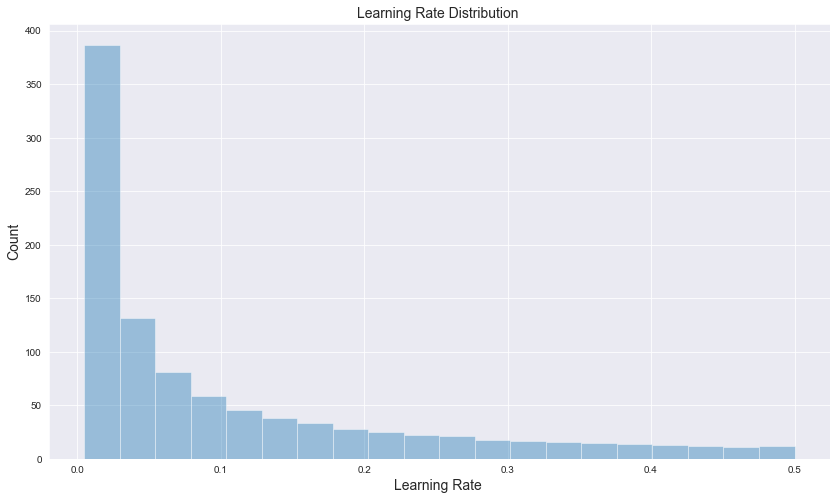

In [94]:
# plot learning rate from hyperparameter dict of lightGBM
plt.figure(figsize = (14,8))
sns.distplot(grid_para['lgbm__learning_rate'],bins=20,kde=False)
plt.xlabel("Learning Rate " ,fontsize =14)
plt.ylabel("Count" ,fontsize =14)
plt.title("Learning Rate Distribution " ,fontsize =14)

In [96]:
com =1 
for x in grid_para.values():
    com *= len(x)
print("there are {} combination " .format(com))    

there are 2620800000000000 combination 


In [97]:
# using objective function to find best hyperpara meter

import itertools


def grid_search(para_grid , max_evals = MAX_EVALS):
    
    # datframe for store 
    results = pd.DataFrame(columns =['score','params','iteration'],index = list(range(MAX_EVALS)))
    
    
    
    # 
    
    keys, values = zip(*grid_para.items())
    
    i = 0
    
    for v in itertools.product(*values):
        hyperpara = dict(zip(keys,v))
        if hyperpara['boosting_type'] == 'goss' :
            hyperpara['subsample'] =1.0
        
        
        #evalute para meter
        
        eval_result = objective()
    
    